<a href="https://colab.research.google.com/github/mutuceng/house-pricing/blob/main/Backend/ML/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [146]:
test_dataset = pd.read_csv('Dataset/test.csv')
train_dataset = pd.read_csv('Dataset/train.csv')

In [147]:
train_dataset.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [148]:
train_dataset.drop(columns=["id"], inplace=True)

In [149]:
train_dataset.shape

(140700, 19)

In [150]:
null_columns = train_dataset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

In [151]:
std_trainset = train_dataset[train_dataset['Working Professional or Student'] == 'Student']
std_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [152]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession            27867
Academic Pressure         9
Work Pressure         27898
CGPA                      9
Study Satisfaction       10
Job Satisfaction      27893
Dietary Habits            2
Financial Stress          3
dtype: int64

C:\Users\ulasu\AppData\Local\Temp\ipykernel_20872\1030208779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=null_columns.index, y=null_columns.values, palette='coolwarm')


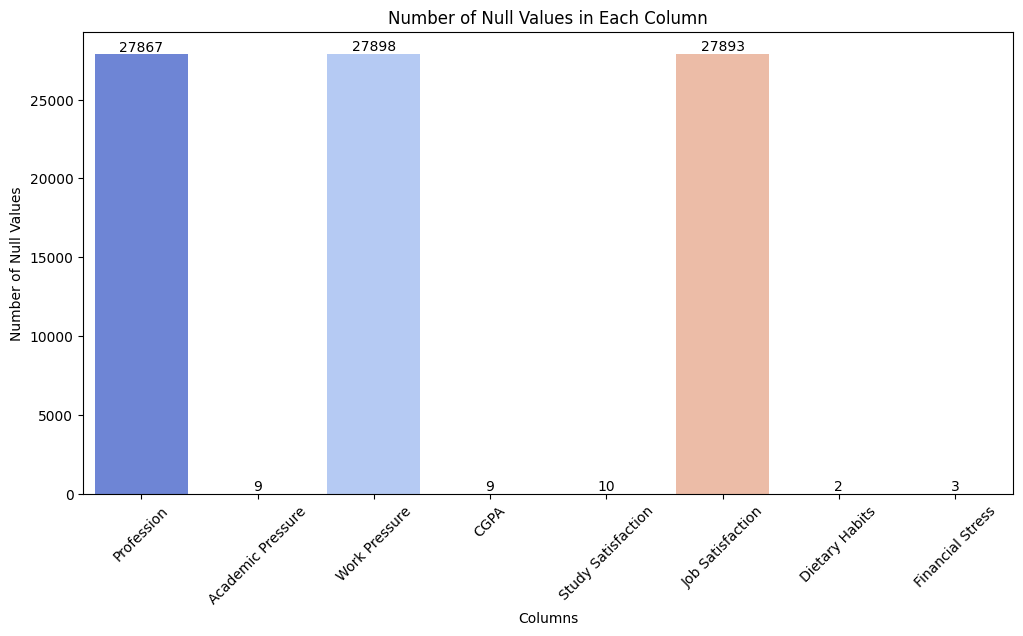

In [153]:
plt.figure(figsize=(12, 6))
sn.barplot(x=null_columns.index, y=null_columns.values, palette='coolwarm')
for i, v in enumerate(null_columns.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.show()


In [154]:
non_null_values = std_trainset[std_trainset['Work Pressure'].notnull()]
non_null_values

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Academic Pressure ve Study Satisfaction'ları Null öğrenci olmayabilirler. ama Profession'lar da null

In [155]:
non_null_values1 = std_trainset[std_trainset['Profession'].notnull()]
non_null_values1.count()

Name                                     34
Gender                                   34
Age                                      34
City                                     34
Working Professional or Student          34
Profession                               34
Academic Pressure                        34
Work Pressure                             0
CGPA                                     34
Study Satisfaction                       34
Job Satisfaction                          0
Sleep Duration                           34
Dietary Habits                           34
Degree                                   34
Have you ever had suicidal thoughts ?    34
Work/Study Hours                         34
Financial Stress                         34
Family History of Mental Illness         34
Depression                               34
dtype: int64

In [156]:
non_null_values1.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
43035,Rupak,Male,23.0,Patna,Student,Manager,3.0,NaN,8.62,2.0,NaN,More than 8 hours,Healthy,BHM,No,9.0,5.0,No,1
25193,Tushar,Male,24.0,Kalyan,Student,Teacher,4.0,NaN,9.66,5.0,NaN,7-8 hours,Moderate,BE,Yes,12.0,3.0,No,1
20049,Himani,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0
19226,Rupak,Male,31.0,Rajkot,Student,Teacher,3.0,NaN,7.48,5.0,NaN,5-6 hours,Unhealthy,MD,Yes,12.0,2.0,Yes,1
127070,Armaan,Male,32.0,Meerut,Student,Pharmacist,4.0,NaN,8.54,1.0,NaN,7-8 hours,Unhealthy,MBBS,Yes,2.0,5.0,Yes,1


Work Pressure ve Job Satisfaction attribute'ları boş. Staj yapıyor olabilirler mi?

In [157]:
non_null_values1.Depression.value_counts()

Depression
1    28
0     6
Name: count, dtype: int64

Hem okuyup hem çalışanlarda depreson yüksek

In [158]:
a = non_null_values1[non_null_values1["Work/Study Hours"] == 0.0]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.5,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1


Öğrenci olarak çalışıp çalışma saati sıfır olan tek sütun var.

In [159]:
non_null_values2 = std_trainset[std_trainset['Job Satisfaction'].notnull()]
non_null_values2.count()

Name                                     8
Gender                                   8
Age                                      8
City                                     8
Working Professional or Student          8
Profession                               0
Academic Pressure                        2
Work Pressure                            3
CGPA                                     2
Study Satisfaction                       2
Job Satisfaction                         8
Sleep Duration                           8
Dietary Habits                           8
Degree                                   8
Have you ever had suicidal thoughts ?    8
Work/Study Hours                         8
Financial Stress                         8
Family History of Mental Illness         8
Depression                               8
dtype: int64

In [160]:
a = non_null_values2[non_null_values2['Academic Pressure'].notnull()]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1


In [161]:
b = non_null_values2[non_null_values2['Work Pressure'].notnull()]
b

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Yaşa da bakmak gerek

In [162]:
age = std_trainset[std_trainset['Age']> 25]
age

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
52,Shrey,Male,30.0,Thane,Student,NaN,3.0,NaN,9.54,4.0,NaN,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


In [163]:
age1 = std_trainset[std_trainset['Age']> 30]
age1

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
62,Nirvaan,Male,31.0,Nashik,Student,NaN,2.0,NaN,8.38,3.0,NaN,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
91,Aakash,Male,33.0,Vadodara,Student,NaN,3.0,NaN,7.03,4.0,NaN,Less than 5 hours,Healthy,BE,Yes,10.0,2.0,Yes,0
186,Pratham,Male,31.0,Ahmedabad,Student,NaN,2.0,NaN,6.08,5.0,NaN,7-8 hours,Moderate,LLB,Yes,3.0,3.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140536,Arya,Male,33.0,Nagpur,Student,NaN,1.0,NaN,7.39,4.0,NaN,7-8 hours,Unhealthy,BHM,No,12.0,2.0,No,0
140624,Vikram,Male,32.0,Rajkot,Student,NaN,4.0,NaN,9.19,1.0,NaN,5-6 hours,Healthy,MSc,No,7.0,4.0,Yes,1
140631,Kunal,Male,33.0,Ahmedabad,Student,NaN,1.0,NaN,5.70,2.0,NaN,Less than 5 hours,Healthy,MCA,Yes,2.0,2.0,No,0
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0


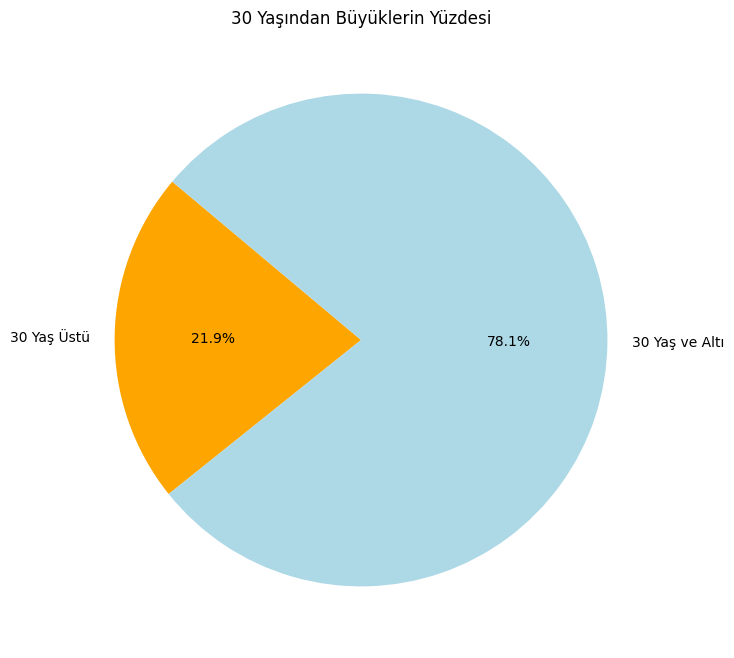

In [164]:
age1_count = len(age1)
total_count = len(std_trainset)
age1_percentage = (age1_count / total_count) * 100
others_percentage = 100 - age1_percentage

labels = ['30 Yaş Üstü', '30 Yaş ve Altı']
sizes = [age1_percentage, others_percentage]
colors = ['orange', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('30 Yaşından Büyüklerin Yüzdesi')
plt.show()

In [165]:
age2 = std_trainset[std_trainset['Age']> 40]
age2.count()

Name                                     19
Gender                                   19
Age                                      19
City                                     19
Working Professional or Student          19
Profession                                0
Academic Pressure                        19
Work Pressure                             0
CGPA                                     19
Study Satisfaction                       19
Job Satisfaction                          0
Sleep Duration                           19
Dietary Habits                           19
Degree                                   19
Have you ever had suicidal thoughts ?    19
Work/Study Hours                         19
Financial Stress                         19
Family History of Mental Illness         19
Depression                               19
dtype: int64

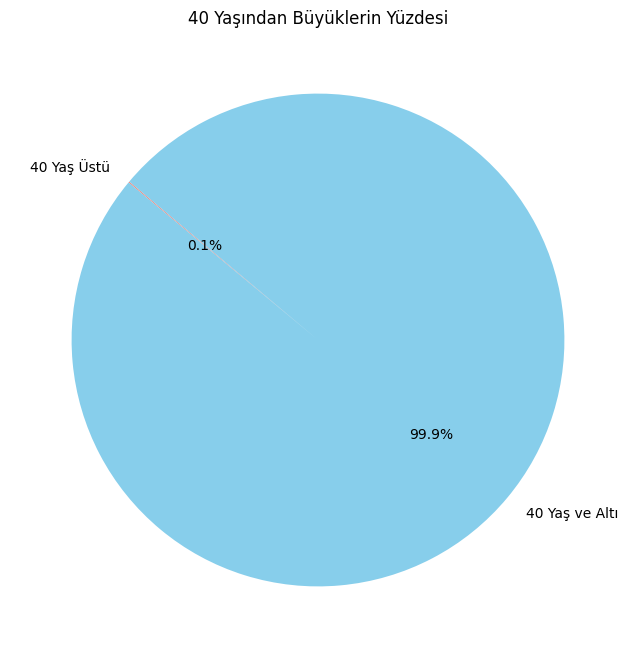

In [166]:
age2_count = len(age2)
total_count = len(std_trainset)
age2_percentage = (age2_count / total_count) * 100
others_percentage = 100 - age2_percentage

labels = ['40 Yaş Üstü', '40 Yaş ve Altı']
sizes = [age2_percentage, others_percentage]
colors = ['salmon', 'skyblue']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('40 Yaşından Büyüklerin Yüzdesi')
plt.show()


Bütün veri setimize göre oldukça düşük bir azınlık. Yanlış girilmiş bir yaş verisi olabilir

In [167]:
null_rows = age2[age2[['Profession', 'Work Pressure', 'Job Satisfaction']].isnull().all(axis=1)]

null_rows.count()


Name                                     19
Gender                                   19
Age                                      19
City                                     19
Working Professional or Student          19
Profession                                0
Academic Pressure                        19
Work Pressure                             0
CGPA                                     19
Study Satisfaction                       19
Job Satisfaction                          0
Sleep Duration                           19
Dietary Habits                           19
Degree                                   19
Have you ever had suicidal thoughts ?    19
Work/Study Hours                         19
Financial Stress                         19
Family History of Mental Illness         19
Depression                               19
dtype: int64

In [168]:
null_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
84722,Shreya,Female,43.0,Bhopal,Student,NaN,5.0,NaN,9.67,1.0,NaN,7-8 hours,Healthy,MSc,Yes,2.0,3.0,Yes,0
118005,Rajat,Male,42.0,Ludhiana,Student,NaN,5.0,NaN,5.32,4.0,NaN,7-8 hours,Unhealthy,Class 12,No,12.0,5.0,Yes,1
111622,Ishaani,Female,42.0,Vasai-Virar,Student,NaN,5.0,NaN,9.56,2.0,NaN,5-6 hours,Moderate,PhD,No,4.0,2.0,Yes,0
22004,Prisha,Female,51.0,Bhopal,Student,NaN,2.0,NaN,8.26,3.0,NaN,Less than 5 hours,Moderate,MBBS,Yes,5.0,5.0,Yes,0
5569,Jiya,Female,42.0,Rajkot,Student,NaN,2.0,NaN,9.03,5.0,NaN,More than 8 hours,Moderate,Class 12,Yes,3.0,1.0,Yes,0


Bunlar öğrenci olup yaşlarını yanlış yazmış olabilirler mi?

In [169]:
null_rows["Degree"].value_counts()

Degree
Class 12    6
PhD         3
MBBS        2
BSc         2
B.Ed        2
LLB         1
MSc         1
MCA         1
MD          1
Name: count, dtype: int64

6 tanesinin lise diploması var

In [170]:
age3 = std_trainset[std_trainset['Age']> 50]
age3

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
14768,Aarohi,Female,58.0,Chennai,Student,NaN,4.0,NaN,8.58,1.0,NaN,7-8 hours,Healthy,Class 12,No,4.0,4.0,No,0
22004,Prisha,Female,51.0,Bhopal,Student,NaN,2.0,NaN,8.26,3.0,NaN,Less than 5 hours,Moderate,MBBS,Yes,5.0,5.0,Yes,0
46602,Shlok,Male,59.0,Nashik,Student,NaN,1.0,NaN,8.14,1.0,NaN,5-6 hours,Unhealthy,PhD,Yes,10.0,4.0,Yes,0
68441,Advait,Male,54.0,Agra,Student,NaN,5.0,NaN,9.60,2.0,NaN,More than 8 hours,Unhealthy,B.Ed,Yes,9.0,3.0,Yes,0
74887,Trisha,Female,56.0,Ludhiana,Student,NaN,3.0,NaN,7.94,5.0,NaN,5-6 hours,Unhealthy,BSc,No,1.0,5.0,Yes,0


In [171]:
age4 = std_trainset[std_trainset['Age']< 18]
age4

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [172]:
depresyon_percentage = std_trainset.groupby('City')['Depression'].mean() * 100
print(depresyon_percentage)

City
3.0                   100.000000
Agra                   53.473492
Ahmedabad              67.297581
Bangalore              60.886571
Bhavna                100.000000
Bhopal                 61.991435
Chennai                59.661017
City                   50.000000
Delhi                  60.937500
Faridabad              58.785249
Gaurav                100.000000
Ghaziabad              57.449664
Harsh                 100.000000
Harsha                 50.000000
Hyderabad              66.940299
Indore                 60.497667
Jaipur                 52.413127
Kalyan                 59.490446
Kanpur                 54.187192
Khaziabad             100.000000
Kibara                  0.000000
Kolkata                60.881801
Less Delhi              0.000000
Less than 5 Kalyan      0.000000
Lucknow                55.497835
Ludhiana               58.235824
M.Com                 100.000000
M.Tech                  0.000000
ME                      0.000000
Meerut                 59.757576
Mihir

C:\Users\ulasu\AppData\Local\Temp\ipykernel_20872\2627367239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=depresyon_percentage_sorted.values, y=depresyon_percentage_sorted.index, palette='viridis')


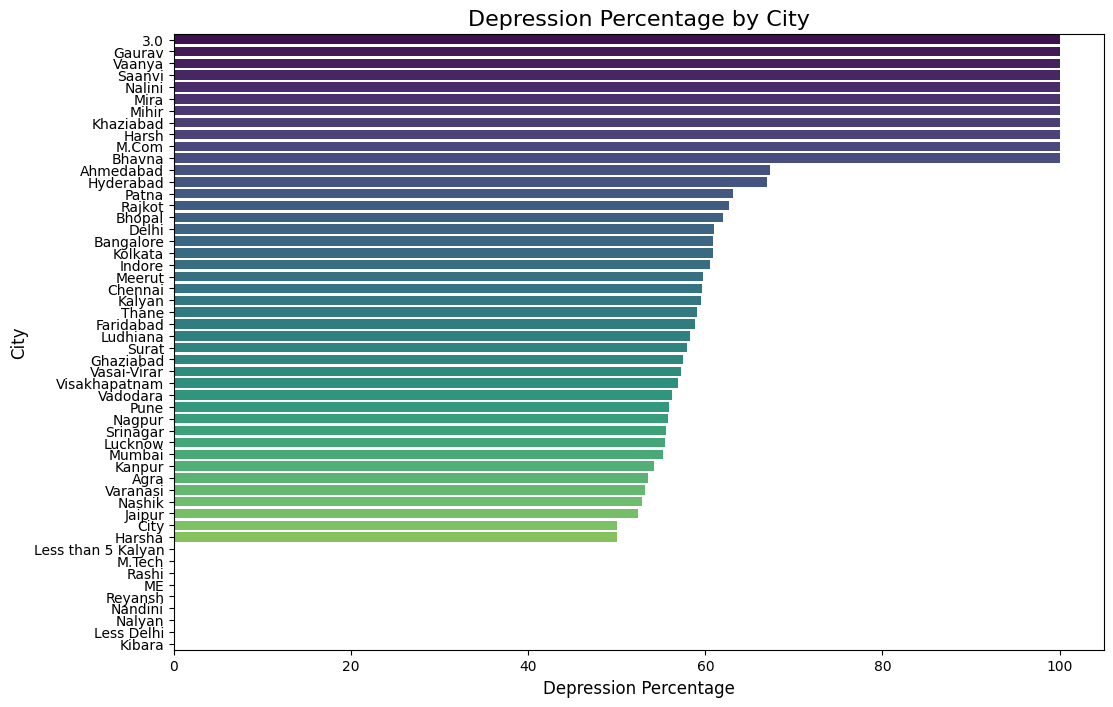

In [173]:
# Veriyi sıralama (opsiyonel)
depresyon_percentage_sorted = depresyon_percentage.sort_values(ascending=False)

# Çubuk grafik
plt.figure(figsize=(12, 8))
sn.barplot(x=depresyon_percentage_sorted.values, y=depresyon_percentage_sorted.index, palette='viridis')
plt.title('Depression Percentage by City', fontsize=16)
plt.xlabel('Depression Percentage', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Gözlemlerimiz sonucu şehir verilerinde hatalar tespit ettik. Bazı şehirler sadece birkaç oy ile belirlenmiş. Bazıları ise şehir bile değil.

In [174]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Şehir isimlerinde sıkıntı var. City? 3.0? Less than 5 Kalyan? ME? M.Com?

In [175]:
city = std_trainset[(std_trainset["City"] == "City") |(std_trainset["City"] == "3.0") | (std_trainset["City"] == "ME") | (std_trainset["City"] == "M.COM") | (std_trainset["City"] == "Less than 5 Kalyan") | (std_trainset["City"] == "M.Tech")]
city

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
28672,Satyam,Male,29.0,M.Tech,Student,NaN,3.0,NaN,7.04,5.0,NaN,7-8 hours,Moderate,M.Tech,No,11.0,1.0,No,0
34300,Aanchal,Female,28.0,City,Student,NaN,3.0,NaN,7.49,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,6.0,2.0,No,1
35309,Sanya,Female,21.0,3.0,Student,NaN,3.0,NaN,8.69,4.0,NaN,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1
36993,Anand,Male,31.0,Less than 5 Kalyan,Student,NaN,1.0,NaN,7.21,1.0,NaN,5-6 hours,Healthy,M.Ed,No,2.0,1.0,No,0
93066,Chhavi,Female,25.0,ME,Student,NaN,2.0,NaN,6.00,2.0,NaN,7-8 hours,Healthy,BHM,Yes,8.0,1.0,No,0
120908,Vrinda,Female,29.0,City,Student,NaN,3.0,NaN,8.58,1.0,NaN,Less than 5 hours,Healthy,LLM,No,6.0,2.0,Yes,0


Bu şehirleri çıkarırız

In [176]:
std_trainset = std_trainset[~((std_trainset["City"] == "City") |
                              (std_trainset["City"] == "3.0") |
                              (std_trainset["City"] == "ME") |
                              (std_trainset["City"] == "M.Com") |
                              (std_trainset["City"] == "Less than 5 Kalyan") |
                              (std_trainset["City"] == "M.Tech"))]

In [177]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'Bhavna', 'Less Delhi', 'Mira',
       'Harsha', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kibara',
       'Rashi', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'],
      dtype=object)

Saanvi, Bhavna, Harsha, Vaanya, Gaurav, Reyansh, Kibara, Mihir, Nalini, Nandini: Bunlar Hindistan'da yaygın kullanılan kişi adlarıdır, şehir isimleri değildir.

In [178]:
city2 = std_trainset[(std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Harsha") | (std_trainset["City"] == "Nandini") | (std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Mihir") | (std_trainset["City"] == "Saanvi") |(std_trainset["City"] == "Bhavna") | (std_trainset["City"] == "Vaanya") | (std_trainset["City"] == "Gaurav") | (std_trainset["City"] == "Reyansh") | (std_trainset["City"] == "Kibara")]
city2

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22293,Harsha,Male,27.0,Saanvi,Student,NaN,2.0,NaN,9.39,2.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,4.0,Yes,1
28862,Vikram,Male,30.0,Bhavna,Student,NaN,5.0,NaN,8.91,1.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,0.0,5.0,No,1
44087,Yuvraj,Male,29.0,Harsha,Student,NaN,3.0,NaN,8.62,1.0,NaN,5-6 hours,Unhealthy,LLB,Yes,12.0,1.0,No,1
63830,Gagan,Male,21.0,Vaanya,Student,NaN,1.0,NaN,9.79,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,10.0,2.0,Yes,1
65042,Ira,Female,29.0,Gaurav,Student,NaN,3.0,NaN,9.44,1.0,NaN,5-6 hours,Unhealthy,M.Ed,Yes,10.0,5.0,Yes,1
70407,Amit,Male,20.0,Reyansh,Student,NaN,2.0,NaN,8.00,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,7.0,2.0,No,0
71144,Aarav,Male,18.0,Bhavna,Student,NaN,2.0,NaN,6.86,5.0,NaN,5-6 hours,Moderate,Class 12,Yes,10.0,1.0,Yes,1
73510,Aditya,Male,21.0,Kibara,Student,NaN,2.0,NaN,7.27,2.0,NaN,7-8 hours,Unhealthy,B.Com,Yes,11.0,1.0,Yes,0
108698,Arjun,Male,31.0,Harsha,Student,NaN,3.0,NaN,6.69,4.0,NaN,More than 8 hours,Unhealthy,MD,No,8.0,3.0,No,0
123668,Ayush,Male,34.0,Mihir,Student,NaN,3.0,NaN,9.10,1.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,10.0,3.0,Yes,1


In [179]:
std_trainset = std_trainset[~((std_trainset["City"] == "Saanvi") |
                              (std_trainset["City"] == "Bhavna") |
                              (std_trainset["City"] == "Less Delhi") |
                              (std_trainset["City"] == "Reyansh") |
                              (std_trainset["City"] == "Kibara") |
                              (std_trainset["City"] == "Mihir") |
                              (std_trainset["City"] == "Nandini") |
                              (std_trainset["City"] == "Vaanya") |
                              (std_trainset["City"] == "Gaurav") |
                              (std_trainset["City"] == "Harsha") |
                              (std_trainset["City"] == "Nalini"))]

In [180]:
depresyon_percentage = std_trainset.groupby('City')['Depression'].mean() * 100
print(depresyon_percentage)

City
Agra              53.473492
Ahmedabad         67.297581
Bangalore         60.886571
Bhopal            61.991435
Chennai           59.661017
Delhi             60.937500
Faridabad         58.785249
Ghaziabad         57.449664
Harsh            100.000000
Hyderabad         66.940299
Indore            60.497667
Jaipur            52.413127
Kalyan            59.490446
Kanpur            54.187192
Khaziabad        100.000000
Kolkata           60.881801
Lucknow           55.497835
Ludhiana          58.235824
Meerut            59.757576
Mira             100.000000
Mumbai            55.221745
Nagpur            55.760369
Nalyan             0.000000
Nashik            52.833638
Patna             63.157895
Pune              55.888430
Rajkot            62.622549
Rashi              0.000000
Srinagar          55.612245
Surat             57.977737
Thane             59.086918
Vadodara          56.195965
Varanasi          53.138686
Vasai-Virar       57.286822
Visakhapatnam     56.965944
Name: Depressio

C:\Users\ulasu\AppData\Local\Temp\ipykernel_20872\2627367239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=depresyon_percentage_sorted.values, y=depresyon_percentage_sorted.index, palette='viridis')


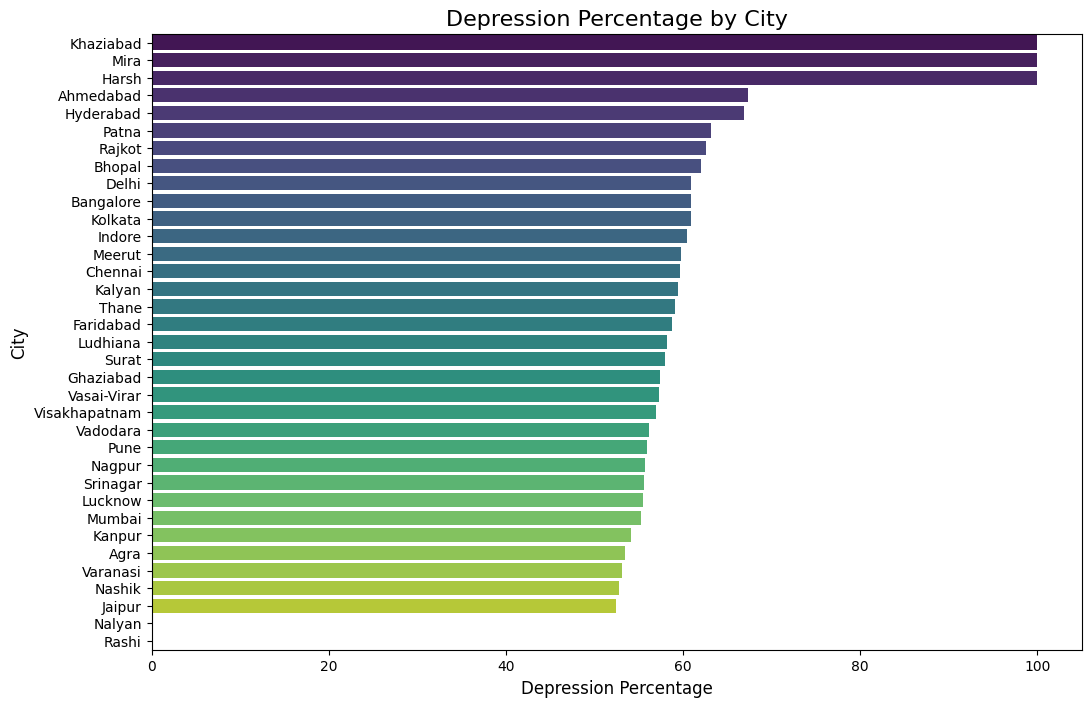

In [181]:
# Veriyi sıralama (opsiyonel)
depresyon_percentage_sorted = depresyon_percentage.sort_values(ascending=False)

# Çubuk grafik
plt.figure(figsize=(12, 8))
sn.barplot(x=depresyon_percentage_sorted.values, y=depresyon_percentage_sorted.index, palette='viridis')
plt.title('Depression Percentage by City', fontsize=16)
plt.xlabel('Depression Percentage', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

In [182]:
std_trainset.shape

(27880, 19)

Degree için de bakalım

In [183]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'S.Tech', '20',
       'Class 11', 'M', 'P.Com', 'BPharm', 'Unite', 'BArch', 'Badhya',
       '0', 'Vivaan', 'BPA', 'Brit', 'B', '7.06', 'Brithika', 'CGPA',
       '24', 'Jhanvi', '8.56', 'LHM', 'Marsh', 'L.Ed', 'B.Student',
       'LL B.Ed', 'Mthanya', 'Esha', 'LLEd', 'E.Tech', 'LCA'],
      dtype=object)

### Geçerli Akademik Dereceler

#### Lisans Dereceleri (Undergraduate):
- B.Pharm
- BSc
- BA
- BCA
- B.Ed
- LLB
- BE
- BHM
- B.Com
- B.Arch
- B.Tech
- BBA
- B.Sc
- BPharm
- BArch
- BPA

#### Yüksek Lisans Dereceleri (Postgraduate):
- M.Tech
- PhD
- M.Ed
- MSc
- M.Pharm
- MCA
- MA
- MBA
- M.Com
- ME
- MHM
- MPA

#### Doktora ve Uzmanlık Dereceleri:
- PhD
- MD
- MBBS

#### Okul Düzeyi (School-Level):
- Class 12
- Class 11


In [184]:
invalid_degrees = ['20', '7.06', '8.56', '0', '24', 'Vivaan', 'Brithika', 'Jhanvi', 
                   'Esha', 'Mthanya', 'Marsh', 'Unite', 'Brit', 'Badhya', 'S.Tech', 
                   'E.Tech', 'CGPA', 'B.Student', 'LL B.Ed', 'LHM', 'L.Ed', 'LLEd', 'LCA']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Degree'].isin(invalid_degrees)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
83955,Kavya,Female,28.0,Kolkata,Student,NaN,3.0,NaN,8.95,5.0,NaN,More than 8 hours,Unhealthy,LHM,No,3.0,4.0,No,0
134938,Yogesh,Male,32.0,Mumbai,Student,NaN,2.0,NaN,5.45,3.0,NaN,More than 8 hours,Unhealthy,LCA,Yes,5.0,5.0,Yes,0
44937,Shivam,Male,26.0,Nagpur,Student,NaN,1.0,NaN,6.47,5.0,NaN,Less than 5 hours,Unhealthy,Vivaan,Yes,2.0,1.0,No,0
130295,Kavya,Female,33.0,Bhopal,Student,NaN,1.0,NaN,7.85,3.0,NaN,7-8 hours,Healthy,E.Tech,Yes,7.0,2.0,No,1
68151,Rishi,Male,31.0,Kanpur,Student,NaN,2.0,NaN,8.95,1.0,NaN,Less than 5 hours,Unhealthy,Brithika,Yes,10.0,4.0,Yes,0


In [185]:
invalid_rows.shape

(23, 19)

In [186]:
std_trainset = std_trainset[~std_trainset['Degree'].isin(invalid_degrees)]

In [187]:
std_trainset.shape

(27857, 19)

In [188]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'Class 11', 'M',
       'P.Com', 'BPharm', 'BArch', 'BPA', 'B'], dtype=object)

Dietary Habits için de bakalım

In [189]:
std_trainset["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', '3', 'Less than Healthy',
       'Mihir', '1.0', nan, 'No Healthy', 'Less Healthy', 'M.Tech',
       'Male', 'Yes', '2'], dtype=object)

In [190]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
60910,Rupal,Female,18.0,Hyderabad,Student,NaN,4.0,NaN,6.59,3.0,NaN,5-6 hours,Moderate,Class 12,Yes,7.0,1.0,No,0
103220,Anand,Male,19.0,Chennai,Student,NaN,5.0,NaN,8.47,3.0,NaN,Less than 5 hours,Moderate,Class 12,Yes,11.0,4.0,Yes,1
29625,Bhavesh,Male,21.0,Delhi,Student,NaN,1.0,NaN,9.97,2.0,NaN,5-6 hours,Moderate,M.Com,No,12.0,1.0,No,0
106779,Kiran,Male,26.0,Ahmedabad,Student,NaN,4.0,NaN,5.66,5.0,NaN,7-8 hours,Moderate,B.Ed,No,11.0,5.0,Yes,0
17384,Eshita,Female,25.0,Bangalore,Student,NaN,3.0,NaN,5.82,2.0,NaN,More than 8 hours,Moderate,B.Pharm,No,3.0,5.0,No,0


In [191]:
moderate = std_trainset[std_trainset["Dietary Habits"] == "Moderate"]
moderate.shape

(9912, 19)

In [192]:
lessHealthy = std_trainset[(std_trainset["Dietary Habits"] == "Less Healthy") | (std_trainset["Dietary Habits"] == "Less than Healthy") ]
lessHealthy

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
34623,Dev,Male,18.0,Vadodara,Student,NaN,1.0,NaN,6.05,5.0,NaN,7-8 hours,Less than Healthy,Class 12,No,4.0,4.0,No,0
73210,Keshav,Male,26.0,Indore,Student,NaN,1.0,NaN,7.49,2.0,NaN,Less than 5 hours,Less Healthy,LLB,Yes,6.0,4.0,No,0


In [193]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Less than Healthy', 'Less Healthy']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.shape

(9, 19)

In [194]:
std_trainset = std_trainset[~std_trainset['Dietary Habits'].isin(invalid_habits)]

In [195]:
std_trainset.shape

(27848, 19)

Sleep Duration?

In [196]:
std_trainset["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       '1-2 hours', '10-11 hours', '40-45 hours', '2-3 hours', 'Moderate',
       '55-66 hours', '3-4 hours', '4-5 hours', '8 hours', '45',
       'than 5 hours', '6-7 hours'], dtype=object)

In [197]:
invalid_hours = ['45', '55-66 hours', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Sleep Duration'].isin(invalid_hours)]
invalid_rows.shape

(3, 19)

In [198]:
std_trainset = std_trainset[~std_trainset['Sleep Duration'].isin(invalid_hours)]
std_trainset.shape

(27845, 19)

In [199]:
std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8294
7-8 hours            7327
5-6 hours            6173
More than 8 hours    6036
6-7 hours               4
10-11 hours             2
2-3 hours               2
3-4 hours               2
1-2 hours               1
40-45 hours             1
4-5 hours               1
8 hours                 1
than 5 hours            1
Name: count, dtype: int64

In [200]:
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].replace({
    'than 5 hours': 'Less than 5 hours',
    '1-2 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': '5-6 hours',
    '6-7 hours': '7-8 hours',
    '8 hours': '7-8 hours',
    '10-11 hours': 'More than 8 hours'
})

std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8300
7-8 hours            7332
5-6 hours            6174
More than 8 hours    6038
40-45 hours             1
Name: count, dtype: int64

Bu da tamam şimdi suicidal thoughtsa bakalım

In [201]:
std_trainset["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17620
No     10225
Name: count, dtype: int64

Bu da temiz. family history?

In [202]:
std_trainset["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14362
Yes    13483
Name: count, dtype: int64

Bu da temiz. Peki Sayısal değerlerde sorun var mı

In [203]:
std_trainset["Financial Stress"].value_counts()

Financial Stress
5.0    6702
4.0    5764
3.0    5219
1.0    5104
2.0    5053
Name: count, dtype: int64

In [204]:
std_trainset["Work/Study Hours"].value_counts()

Work/Study Hours
10.0    4228
12.0    3167
11.0    2888
8.0     2506
6.0     2244
9.0     2025
7.0     1995
0.0     1695
4.0     1610
2.0     1579
3.0     1466
5.0     1294
1.0     1148
Name: count, dtype: int64

In [205]:
std_trainset["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6351
2.0    5826
3.0    5808
1.0    5438
5.0    4412
Name: count, dtype: int64

In [206]:
std_trainset["CGPA"].value_counts()

CGPA
8.04    820
9.96    424
5.74    409
8.95    368
9.21    343
       ... 
7.65      1
6.77      1
8.26      1
7.23      1
6.09      1
Name: count, Length: 331, dtype: int64

Burada bir sorun olabilir ama olmaya da bilir 

In [207]:
std_trainset["Academic Pressure"].value_counts()

Academic Pressure
3.0    7441
5.0    6288
4.0    5150
1.0    4791
2.0    4166
Name: count, dtype: int64

Son kez bi null'lara bakalım

In [208]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession            27811
Academic Pressure         9
Work Pressure         27842
CGPA                      9
Study Satisfaction       10
Job Satisfaction      27837
Dietary Habits            2
Financial Stress          3
dtype: int64

C:\Users\ulasu\AppData\Local\Temp\ipykernel_20872\3025964491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=null_columns.index, y=null_columns.values, palette='coolwarm')


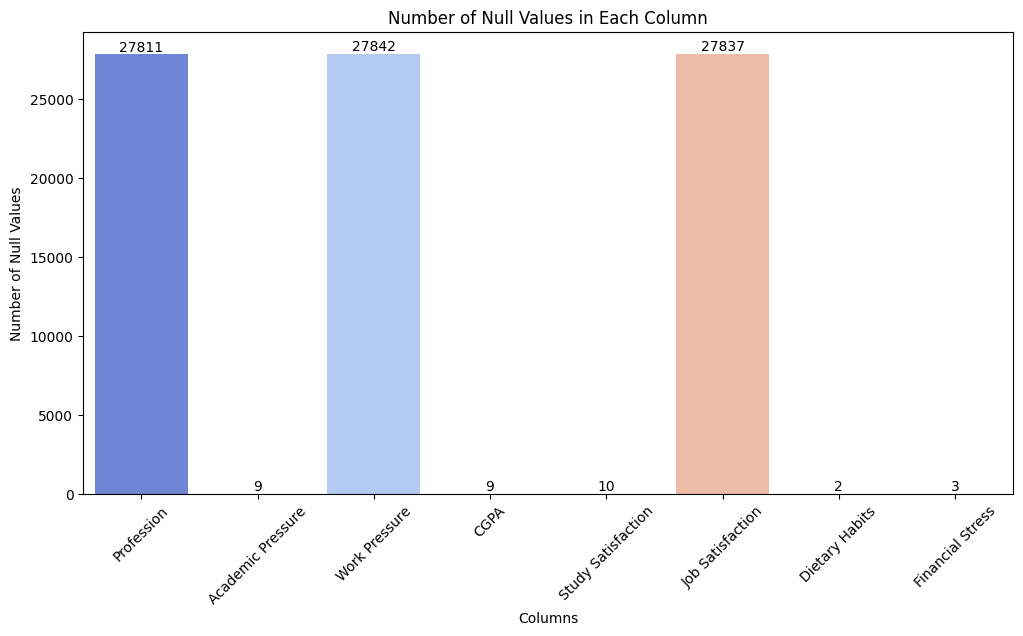

In [209]:
plt.figure(figsize=(12, 6))
sn.barplot(x=null_columns.index, y=null_columns.values, palette='coolwarm')
for i, v in enumerate(null_columns.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.show()

In [210]:
null_rows1 = std_trainset[std_trainset[['Financial Stress']].isnull().all(axis=1)]

null_rows1


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22377,Manvi,Female,32.0,Varanasi,Student,NaN,3.0,NaN,5.64,1.0,NaN,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
68910,Arav,Male,29.0,Hyderabad,Student,NaN,2.0,NaN,8.94,3.0,NaN,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
97610,Pari,Female,20.0,Kolkata,Student,NaN,1.0,NaN,6.83,1.0,NaN,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


Null olanları 0 ile doldururuz

In [211]:
std_trainset['Financial Stress'] = std_trainset['Financial Stress'].fillna(0)

In [212]:
atts_withNull = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Dietary Habits']
for column in atts_withNull:
    if std_trainset[column].isnull().sum() > 0:  # Eğer sütun eksik değer içeriyorsa
        most_frequent_value = std_trainset[column].mode()[0]  # Sütunun modunu al
        std_trainset[column].fillna(most_frequent_value, inplace=True)  # Eksik değerleri doldur


In [213]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27811
Work Pressure       27842
Job Satisfaction    27837
dtype: int64

In [214]:
std_trainset.shape

(27845, 19)

In [215]:
a = std_trainset[std_trainset["Profession"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
2105,Shreya,Female,31.0,Vadodara,Student,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1
9483,Vidya,Female,32.0,Kalyan,Student,UX/UI Designer,3.0,NaN,9.60,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1
11470,Anjali,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.50,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1
16196,Ivaan,Male,33.0,Jaipur,Student,Architect,2.0,NaN,7.13,4.0,NaN,More than 8 hours,Moderate,MSc,No,2.0,5.0,Yes,1
16959,Vidhi,Female,24.0,Mumbai,Student,Architect,3.0,NaN,8.89,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,3.0,5.0,Yes,1
18291,Ritvik,Male,32.0,Agra,Student,Educational Consultant,3.0,NaN,5.74,4.0,NaN,7-8 hours,Healthy,B.Ed,Yes,3.0,5.0,Yes,1
19226,Rupak,Male,31.0,Rajkot,Student,Teacher,3.0,NaN,7.48,5.0,NaN,5-6 hours,Unhealthy,MD,Yes,12.0,2.0,Yes,1
20049,Himani,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0


Anladığım kadarıyla öğrenciler bölümlerini yazmıslar o yüzden professionları null değil

In [216]:
a = std_trainset[std_trainset["Work Pressure"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


In [217]:
a = std_trainset[std_trainset["Job Satisfaction"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,Veda,Female,20.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,Anand,Male,18.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,Aaradhya,Female,24.0,Meerut,Student,NaN,3.0,NaN,8.04,4.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


In [218]:
std_trainset = std_trainset[~(std_trainset["Job Satisfaction"].notnull() | std_trainset["Work Pressure"].notnull())]

In [219]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27803
Work Pressure       27837
Job Satisfaction    27837
dtype: int64

In [220]:
std_trainset.loc[std_trainset["Profession"].notnull(), "Profession"] = None

In [221]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27837
Work Pressure       27837
Job Satisfaction    27837
dtype: int64

In [222]:
std_trainset = std_trainset.drop(columns=["Name", "Working Professional or Student","Profession", "Work Pressure", "Job Satisfaction"])

In [223]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
128369,Male,25.0,Jaipur,3.0,6.83,3.0,More than 8 hours,Unhealthy,MBA,Yes,11.0,2.0,Yes,1
136676,Female,25.0,Visakhapatnam,4.0,5.35,4.0,5-6 hours,Healthy,M.Ed,No,2.0,4.0,No,0
26263,Female,20.0,Bhopal,5.0,6.37,3.0,More than 8 hours,Unhealthy,Class 12,Yes,11.0,4.0,Yes,1
119123,Male,22.0,Nashik,4.0,8.04,4.0,Less than 5 hours,Unhealthy,B.Arch,Yes,11.0,4.0,No,1
113500,Female,26.0,Chennai,1.0,5.86,3.0,More than 8 hours,Moderate,B.Pharm,No,10.0,1.0,No,0


In [224]:
std_trainset.shape

(27837, 14)

In [225]:
std_trainset["Degree"].value_counts()

Degree
Class 12    6069
B.Ed        1864
B.Com       1504
B.Arch      1477
BCA         1430
MSc         1188
B.Tech      1152
MCA         1043
M.Tech      1021
BHM          924
BSc          887
M.Ed         818
B.Pharm      809
M.Com        734
BBA          696
MBBS         696
LLB          669
BE           610
BA           600
M.Pharm      581
MD           571
MBA          561
MA           544
PhD          520
LLM          481
MHM          191
ME           185
B              2
BH             1
B.Sc           1
Bhopal         1
Class 11       1
M              1
P.Com          1
BPharm         1
BArch          1
BPA            1
MPA            1
Name: count, dtype: int64

In [226]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'Class 11', 'M',
       'P.Com', 'BPharm', 'BArch', 'BPA', 'B'], dtype=object)

In [227]:
ma_bhopal_count = std_trainset[(std_trainset['Degree'] == 'MA') | (std_trainset['Degree'] == 'Bhopal')].shape[0]
print(ma_bhopal_count)

545


In [228]:
std_trainset = std_trainset[~((std_trainset['Degree'] == 'MA') | (std_trainset['Degree'] == 'Bhopal'))]

In [229]:
std_trainset = std_trainset[~(std_trainset['Degree'] == 'M') ]

In [230]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'B.Com', 'MD',
       'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'ME',
       'MHM', 'MPA', 'BH', 'B.Sc', 'Class 11', 'P.Com', 'BPharm', 'BArch',
       'BPA', 'B'], dtype=object)

Bu kadar çok degree arasında nasıl hiyerarşi kuracağım?

### Ufak araştırma sonucu 
- B ile başlayanların Bachealor yani Lisans olduklarını 
- M ile başlayanlar Master yani Yüksek Lisans
- P ile başlayanlar ise Phd 
- Class ile başlayanlar ise Lise

In [231]:
# Eğitim seviyelerini sıralı şekilde kodlamak
degree_mapping = {
    'Class 12': "HighSchool",  # Ortaöğretim
    'Class 11': "HighSchool",  # Ortaöğretim
    'B.Pharm': "Bachealor",   # Lisans
    'BSc': "Bachealor",       # Lisans
    'BA': "Bachealor",        # Lisans
    'BCA': "Bachealor",       # Lisans
    'BHM': "Bachealor",
    'B.Ed': "Bachealor",      # Lisans
    'LLB': "Bachealor",       # Lisans
    'BE': "Bachealor",        # Lisans
    'B.Tech': "Bachealor",    # Lisans
    'BBA': "Bachealor",       # Lisans
    'B.Arch': "Bachealor",    # Lisans
    'M.Ed': "Master",      # Yüksek Lisans
    'MSc': "Master",       # Yüksek Lisans
    'M.Pharm': "Master",   # Yüksek Lisans
    'MBA': "Master",       # Yüksek Lisans
    'MD': "Master",        # Yüksek Lisans
    'MBBS': "Master",      # Yüksek Lisans
    'MCA': "Master",       # Yüksek Lisans
    'M.Com': "Master",     # Yüksek Lisans
    'LLM': "Master",       # Yüksek Lisans
    'ME': "Master",        # Yüksek Lisans
    'PhD': "Phd",          # Doktora
    'Class 12': "HighSchool",  # Ortaöğretim
    'Class 11': "HighSchool",  # Ortaöğretim
    'B.Sc': "Bachealor",       # Lisans
    'BPharm': "Bachealor",     # Lisans
    'BArch': "Bachealor",      # Lisans
    'BPA': "Bachealor",        # Lisans
    'MHM': "Master",           # Yüksek Lisans
    'MPA': "Master",           # Yüksek Lisans
    'BH': "Bachealor",         # Lisans
    'P.Com': "Master",         # Yüksek Lisans
    'B': "Bachealor",           # Lisans
    "M.Tech": "Master",         # Yüksek Lisans
    "B.Com": "Bachealor"         # Lisans"
}

# Veriye uygulama
std_trainset['Degree'] = std_trainset['Degree'].map(degree_mapping)

# Eksik veya hatalı değerleri kontrol etme
std_trainset['Degree'].value_counts()

Degree
Bachealor     12629
Master         8072
HighSchool     6070
Phd             520
Name: count, dtype: int64

In [232]:
std_trainset["Degree"].unique()

array(['Bachealor', 'Master', 'Phd', 'HighSchool'], dtype=object)

In [233]:
std_trainset["Degree"].unique()
nan_count = std_trainset["Degree"].isna().sum()
nan_count

0

In [234]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.851453  56.148547
HighSchool  29.192751  70.807249
Master      46.295837  53.704163
Phd         45.192308  54.807692


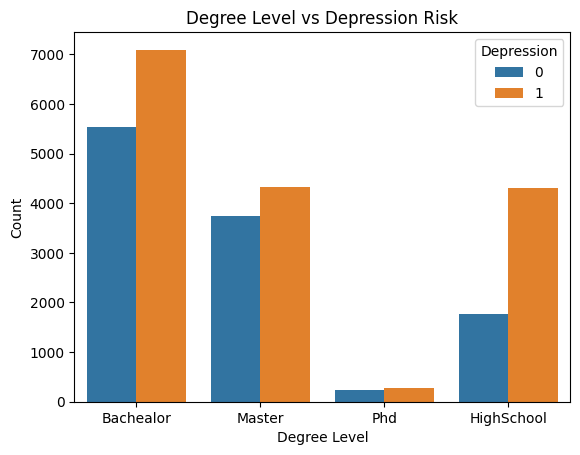

In [235]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [236]:
std_trainset["City"].value_counts()

City
Kalyan           1546
Srinagar         1330
Hyderabad        1310
Vasai-Virar      1275
Lucknow          1127
Thane            1112
Ludhiana         1083
Agra             1081
Surat            1063
Kolkata          1049
Jaipur           1006
Patna             979
Visakhapatnam     956
Pune              950
Ahmedabad         933
Bhopal            900
Chennai           869
Meerut            799
Rajkot            796
Delhi             757
Bangalore         756
Ghaziabad         732
Mumbai            682
Vadodara          681
Varanasi          676
Indore            635
Nagpur            633
Kanpur            589
Nashik            531
Faridabad         450
Mira                1
Harsh               1
Rashi               1
Nalyan              1
Khaziabad           1
Name: count, dtype: int64

In [237]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('City')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_degree_sorted = depression_by_degree[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_degree_sorted)

City
Khaziabad        100.000000
Mira             100.000000
Harsh            100.000000
Ahmedabad         67.309753
Hyderabad         67.175573
Patna             63.534219
Rajkot            62.311558
Bhopal            62.000000
Delhi             61.162483
Bangalore         61.111111
Indore            60.787402
Kolkata           60.629171
Chennai           59.953970
Meerut            59.824781
Kalyan            59.637775
Thane             59.352518
Faridabad         58.666667
Ludhiana          58.356417
Surat             58.137347
Vasai-Virar       57.490196
Visakhapatnam     57.112971
Ghaziabad         56.967213
Pune              56.315789
Nagpur            56.240126
Vadodara          55.947137
Mumbai            55.865103
Srinagar          55.639098
Lucknow           55.634428
Kanpur            53.989813
Agra              53.469010
Varanasi          53.254438
Jaipur            52.683897
Nashik            52.354049
Nalyan                  NaN
Rashi                   NaN
Name: 1, dtype:

In [238]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Mira', 'Harsh', 'Rashi', 'Nalyan',
       'Khaziabad'], dtype=object)

Vasai-Virar >> Mumbai 
Rashi şehir değil 
Nalyan da değil 

In [239]:
std_trainset = std_trainset[~((std_trainset["City"] == "Rashi") |
                              (std_trainset["City"] == "Nalyan") )]

In [240]:
std_trainset["Degree"].unique()

array(['Bachealor', 'Master', 'Phd', 'HighSchool'], dtype=object)

In [241]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Mira', 'Harsh', 'Khaziabad'], dtype=object)

In [242]:
std_trainset.loc[std_trainset['City'] == 'Vasai-Virar', 'City'] = 'Mumbai'

In [243]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Kanpur', 'Patna', 'Faridabad', 'Delhi',
       'Mira', 'Harsh', 'Khaziabad'], dtype=object)

In [244]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool") & (std_trainset["Age"] > 40)  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
5569,Female,42.0,Rajkot,2.0,9.03,5.0,More than 8 hours,Moderate,HighSchool,Yes,3.0,1.0,Yes,0
14768,Female,58.0,Chennai,4.0,8.58,1.0,7-8 hours,Healthy,HighSchool,No,4.0,4.0,No,0
17213,Male,49.0,Nagpur,3.0,6.47,3.0,5-6 hours,Moderate,HighSchool,Yes,2.0,1.0,Yes,0
118005,Male,42.0,Ludhiana,5.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,12.0,5.0,Yes,1
126970,Female,48.0,Rajkot,3.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,1.0,4.0,Yes,1
130893,Male,41.0,Patna,3.0,5.85,1.0,5-6 hours,Moderate,HighSchool,No,11.0,5.0,Yes,1


In [245]:
std_trainset["Degree"].unique()

array(['Bachealor', 'Master', 'Phd', 'HighSchool'], dtype=object)

In [246]:
std_trainset = std_trainset[~((std_trainset["Degree"] == "HighSchool") & (std_trainset["Age"] > 20))]


In [247]:
std_trainset["Degree"].unique()

array(['Bachealor', 'Master', 'Phd', 'HighSchool'], dtype=object)

In [248]:
std_trainset.shape

(26535, 14)

In [249]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool")  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
100,Female,19.0,Rajkot,2.0,8.52,4.0,Less than 5 hours,Unhealthy,HighSchool,No,6.0,2.0,Yes,0
103,Female,19.0,Kalyan,5.0,5.64,5.0,Less than 5 hours,Moderate,HighSchool,Yes,4.0,5.0,Yes,1
132,Female,20.0,Ahmedabad,5.0,7.25,3.0,5-6 hours,Healthy,HighSchool,Yes,10.0,3.0,No,1
139,Male,19.0,Chennai,2.0,7.83,2.0,7-8 hours,Unhealthy,HighSchool,No,6.0,3.0,No,0
173,Male,18.0,Bangalore,4.0,7.10,3.0,More than 8 hours,Unhealthy,HighSchool,Yes,11.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140594,Male,18.0,Meerut,5.0,6.25,3.0,7-8 hours,Unhealthy,HighSchool,No,11.0,2.0,Yes,1
140597,Female,19.0,Mumbai,2.0,9.21,5.0,5-6 hours,Unhealthy,HighSchool,Yes,3.0,2.0,No,0
140630,Male,19.0,Kolkata,4.0,7.13,1.0,More than 8 hours,Moderate,HighSchool,No,10.0,2.0,No,1
140669,Female,20.0,Indore,3.0,7.72,5.0,Less than 5 hours,Moderate,HighSchool,Yes,8.0,1.0,No,0


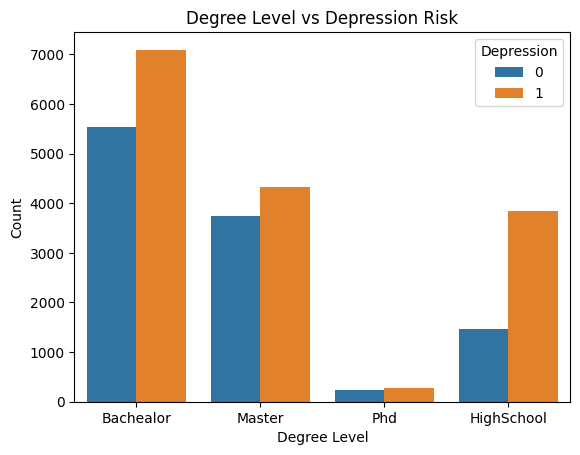

In [250]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [251]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.842560  56.157440
HighSchool  27.539503  72.460497
Master      46.295837  53.704163
Phd         45.192308  54.807692


In [252]:
result = std_trainset.groupby(['City', 'Depression']).size().unstack(fill_value=0)

# Depression = 1'in oranını ekleme
result['Total'] = result[0] + result[1]
result['Depression_1_Ratio'] = (result[1] / result['Total']) * 100

# Son tablo
result = result.rename(columns={0: 'Depression_0_Count', 1: 'Depression_1_Count'})
result = result[['Depression_0_Count', 'Depression_1_Count']].reset_index()

print(result)

Depression           City  Depression_0_Count  Depression_1_Count
0                    Agra                 494                 565
1               Ahmedabad                 298                 607
2               Bangalore                 286                 449
3                  Bhopal                 330                 540
4                 Chennai                 337                 515
5                   Delhi                 292                 456
6               Faridabad                 166                 230
7               Ghaziabad                 312                 404
8                   Harsh                   0                   1
9               Hyderabad                 419                 865
10                 Indore                 243                 373
11                 Jaipur                 465                 524
12                 Kalyan                 614                 908
13                 Kanpur                 252                 291
14        

In [253]:
std_trainset = std_trainset[~(std_trainset['City'] == "Rashi") |
                            (std_trainset['City'] == "Nalyan") |
                            (std_trainset['City'] == "Khaziabad") |
                            (std_trainset['City'] == "Harsh") ]

In [254]:
std_trainset["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy     9852
Moderate      9438
Healthy       7244
No Healthy       1
Name: count, dtype: int64

In [255]:
std_trainset = std_trainset[~((std_trainset["Dietary Habits"] == "3") |
                              (std_trainset["Dietary Habits"] == "1.0") |
                              (std_trainset["Dietary Habits"] == "No Healthy") |
                              (std_trainset["Dietary Habits"] == "M.Tech") |
                              (std_trainset["Dietary Habits"] == "Male") |
                              (std_trainset["Dietary Habits"] == "Yes")|
                              (std_trainset["Dietary Habits"] == "2") |
                                (std_trainset["Dietary Habits"] == "Less Healthy") | 
                               (std_trainset["Dietary Habits"] == "Mihir") )]

In [256]:
std_trainset["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    9852
Moderate     9438
Healthy      7244
Name: count, dtype: int64

In [257]:
std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    7918
7-8 hours            6981
5-6 hours            5898
More than 8 hours    5736
40-45 hours             1
Name: count, dtype: int64

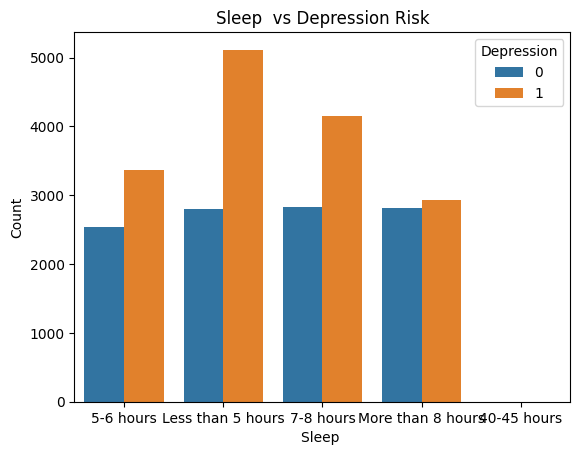

In [258]:
sn.countplot(x='Sleep Duration', hue='Depression', data=std_trainset)
plt.title('Sleep  vs Depression Risk')
plt.xlabel('Sleep ')
plt.ylabel('Count')
plt.show()

In [259]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_sleep = std_trainset.groupby('Sleep Duration')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_sleep_sorted = depression_by_sleep[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_sleep_sorted)

Sleep Duration
40-45 hours          100.000000
Less than 5 hours     64.599646
7-8 hours             59.518694
5-6 hours             57.053238
More than 8 hours     51.011158
Name: 1, dtype: float64


In [260]:
sleep_mapping = {
    'Less than 5 hours' : 4,
    '7-8 hours': 2,
    '5-6 hours':3,
    'More than 8 hours':1
}

# Veriye uygulama
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].map(sleep_mapping)

In [261]:
std_trainset['Sleep Duration'].unique()

array([ 3.,  4.,  2.,  1., nan])

In [262]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
116784,Female,29.0,Faridabad,4.0,6.75,5.0,1.0,Healthy,Bachealor,Yes,7.0,2.0,Yes,0
26718,Female,20.0,Nagpur,1.0,9.86,1.0,4.0,Healthy,HighSchool,Yes,1.0,4.0,Yes,0
62317,Female,33.0,Delhi,5.0,8.04,2.0,3.0,Moderate,Bachealor,Yes,12.0,3.0,Yes,0
65456,Male,28.0,Nagpur,2.0,7.85,4.0,2.0,Unhealthy,Bachealor,Yes,10.0,4.0,No,1
14862,Male,24.0,Varanasi,4.0,6.04,3.0,2.0,Unhealthy,Bachealor,No,3.0,2.0,No,0


In [263]:
std_trainset['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [264]:
eating_mapping = {
    'Unhealthy' : 2,
    'Healthy': 0,
    'Moderate':1
}

# Veriye uygulama
std_trainset['Dietary Habits'] = std_trainset['Dietary Habits'].map(eating_mapping)

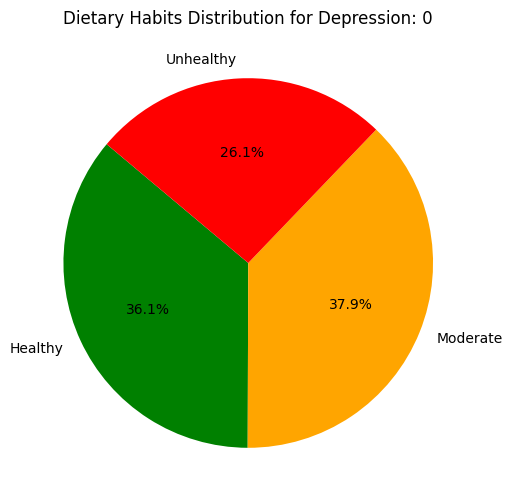

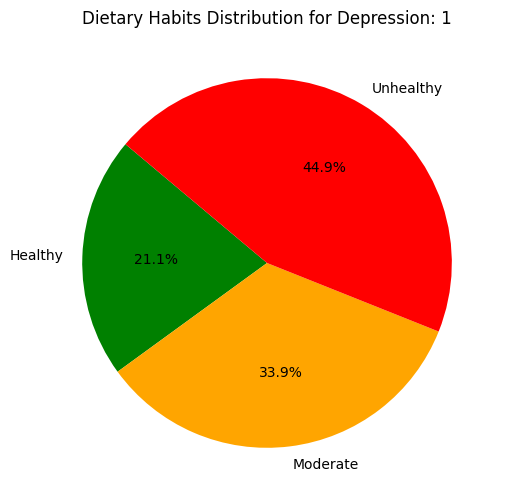

In [289]:
# Gruplama ve sayma
grouped = std_trainset.groupby(['Depression', 'Dietary Habits']).size().unstack()

# Pasta grafiği için hazırlanma
for depression_status in grouped.index:
    labels = ['Healthy', 'Moderate', 'Unhealthy']
    values = grouped.loc[depression_status]
    
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
    plt.title(f'Dietary Habits Distribution for Depression: {depression_status}')
    plt.show()

In [265]:
std_trainset['Dietary Habits'].unique()

array([0, 1, 2], dtype=int64)

In [266]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
108928,Male,19.0,Kanpur,4.0,9.86,1.0,1.0,0,HighSchool,Yes,6.0,4.0,Yes,1
78369,Male,27.0,Hyderabad,5.0,8.79,4.0,2.0,0,Bachealor,Yes,10.0,3.0,Yes,1
86321,Male,20.0,Srinagar,3.0,8.62,1.0,4.0,1,HighSchool,Yes,5.0,5.0,Yes,1
102495,Male,21.0,Meerut,2.0,5.32,5.0,4.0,0,Master,Yes,5.0,4.0,Yes,1
75860,Male,29.0,Nashik,5.0,8.35,2.0,4.0,0,Master,Yes,10.0,5.0,No,1


In [267]:
std_trainset['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [268]:
std_trainset['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [269]:
ever_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
std_trainset['Have you ever had suicidal thoughts ?'] = std_trainset['Have you ever had suicidal thoughts ?'].map(ever_mapping)

In [270]:
family_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
std_trainset['Family History of Mental Illness'] = std_trainset['Family History of Mental Illness'].map(family_mapping)

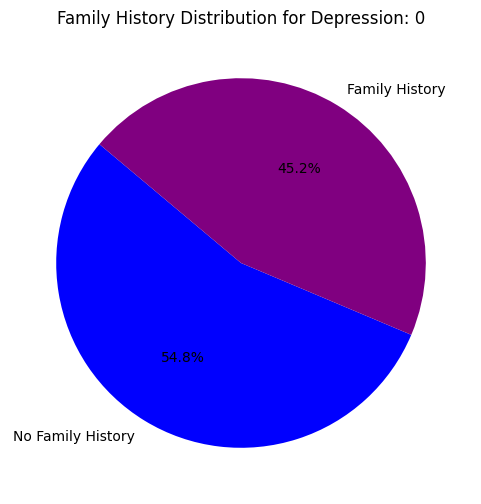

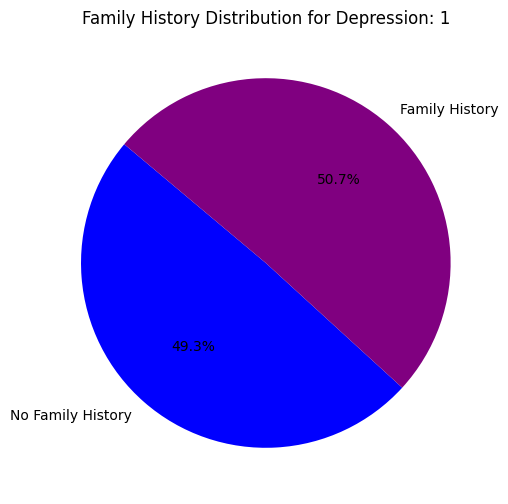

In [290]:
# Gruplama ve sayma
grouped = std_trainset.groupby(['Depression', 'Family History of Mental Illness']).size().unstack()

# Pasta grafiği için hazırlanma
for depression_status in grouped.index:
    labels = ['No Family History', 'Family History']
    values = grouped.loc[depression_status]
    
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'purple'])
    plt.title(f'Family History Distribution for Depression: {depression_status}')
    plt.show()

In [271]:
std_trainset['Degree'].unique()

array(['Bachealor', 'Master', 'Phd', 'HighSchool'], dtype=object)

depresyon_oranları = std_trainset.groupby('City')['Depression'].mean()

city_score_mapping = {
    'Ahmedabad': 67,
    'Hyderabad': 67,
    'Patna': 63,
    'Rajkot': 62,
    'Bhopal': 62,
    'Kolkata': 61,
    'Bangalore': 61,
    'Indore': 60,
    'Delhi': 60,
    'Meerut': 60,
    'Chennai': 59,
    'Kalyan': 59,
    'Thane': 59,
    'Surat': 58,
    'Faridabad': 58,
    'Ludhiana': 58,
    'Ghaziabad': 57,
    'Visakhapatnam': 57,
    'Vasai-Virar': 57,
    'Vadodara': 56,
    'Pune': 56,
    'Nagpur': 56,
    'Lucknow': 55,
    'Srinagar': 55,
    'Mumbai': 55,
    'Kanpur': 55,
    'Agra': 53,
    'Varanasi': 53,
    'Nashik': 52,
    'Jaipur': 52,
    'Nashik' : 51,
    'Agra' : 51,
    'Mumbai' : 50,
    'Varanasi': 49
}
# Mapleme sonucunu kontrol etme
std_trainset['City'] = std_trainset['City'].map(city_score_mapping)

std_trainset.value_counts()

In [272]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
74007,Female,34.0,Mumbai,1.0,6.89,3.0,1.0,2,Master,0,6.0,4.0,0,0
140122,Female,24.0,Pune,3.0,5.68,5.0,4.0,0,Bachealor,0,11.0,3.0,1,1
7302,Male,33.0,Mumbai,1.0,7.48,4.0,3.0,2,Bachealor,0,11.0,2.0,0,0
51932,Female,29.0,Agra,3.0,8.95,3.0,2.0,2,Bachealor,1,9.0,3.0,1,1
1657,Female,21.0,Kalyan,5.0,6.16,1.0,3.0,1,Bachealor,1,8.0,5.0,0,1


In [273]:
over_30bachealor = len( std_trainset[(std_trainset["Age"]>30 ) & (std_trainset["Degree"] == "Bachealor")])
print("Number of people who are over 30 and have a Bachealor degree:", over_30bachealor)

Number of people who are over 30 and have a Bachealor degree: 2817


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(std_trainset, test_size=0.3, random_state=42)

# Define the features and target variable
X_train = train_set.drop(columns=['Depression'])
y_train = train_set['Depression']
X_test = test_set.drop(columns=['Depression'])
y_test = test_set['Depression']

# Train the DecisionTree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [274]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
20617,Male,22.0,Lucknow,3.0,7.51,1.0,3.0,1,Master,1,8.0,5.0,0,1
74479,Female,28.0,Lucknow,4.0,9.39,2.0,4.0,2,Bachealor,1,11.0,4.0,0,1
81791,Female,19.0,Nashik,1.0,9.46,3.0,3.0,0,HighSchool,0,1.0,5.0,1,0
115718,Male,26.0,Pune,5.0,5.56,3.0,3.0,1,Bachealor,1,6.0,5.0,0,1
49248,Female,29.0,Mumbai,2.0,9.86,3.0,1.0,1,Master,0,9.0,3.0,1,0


In [275]:
emp_trainset = train_dataset[train_dataset['Working Professional or Student'] != 'Student']
emp_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,Ishaani,Female,45.0,Ahmedabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [276]:
# Null olmayan satırları filtreleme
non_null_emp_trainset = emp_trainset[emp_trainset['Academic Pressure'].notnull() & emp_trainset['Study Satisfaction'].notnull() & emp_trainset['CGPA'].notnull()]

# Null olmayan satırların sayısı
non_null_count = non_null_emp_trainset.shape[0]

# 5 tane örnek
sample_non_null_emp_trainset = non_null_emp_trainset.sample(5)

print(f"Non-null rows count: {non_null_count}")
sample_non_null_emp_trainset

Non-null rows count: 5


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
41915,Advait,Male,18.0,Kolkata,Working Professional,NaN,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
99062,Tanisha,Female,24.0,Surat,Working Professional,Content Writer,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
55827,Prachi,Female,19.0,Kalyan,Working Professional,NaN,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1
101189,Keshav,Male,34.0,Rajkot,Working Professional,NaN,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0
18752,Aarti,Female,18.0,Kalyan,Working Professional,NaN,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1


In [277]:
nullprofession_emp_trainset = emp_trainset[emp_trainset['Profession'].isnull()]
nullprofession_emp_trainset


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,Raunak,Male,21.0,Pune,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140647,Yuvraj,Male,35.0,Rajkot,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,7-8 hours,Unhealthy,Class 12,Yes,11.0,2.0,Yes,1
140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0
140666,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,5.0,No,1
140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1


In [278]:
nullprofession_female_emp_trainset = emp_trainset[emp_trainset['Profession'].isnull() & (emp_trainset['Gender'] == 'Female')]

# Sonucu görüntüleme
nullprofession_female_emp_trainset


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
82,Saanvi,Female,49.0,Hyderabad,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,3.0,No,0
101,Mira,Female,48.0,Ludhiana,Working Professional,NaN,NaN,3.0,NaN,NaN,2.0,5-6 hours,Healthy,Class 12,Yes,8.0,4.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140559,Vibha,Female,18.0,Agra,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,7-8 hours,Unhealthy,Class 12,Yes,7.0,2.0,No,0
140561,Aarti,Female,18.0,Pune,Working Professional,NaN,NaN,3.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,Yes,8.0,4.0,Yes,0
140606,Mahi,Female,50.0,Delhi,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Healthy,Class 12,No,1.0,1.0,No,0
140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1


In [279]:
anullprofession_female_emp_trainset = emp_trainset[emp_trainset['Profession'].isnull() & (emp_trainset['Age'] < 20)]

# Sonucu görüntüleme
anullprofession_female_emp_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
70,Abhishek,Male,18.0,Vasai-Virar,Working Professional,NaN,NaN,5.0,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,6.0,4.0,No,1
81,Reyansh,Male,19.0,Nagpur,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,11.0,2.0,No,1
93,Shiv,Male,18.0,Thane,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,7-8 hours,Unhealthy,Class 12,No,2.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140593,Tushar,Male,18.0,Surat,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,5-6 hours,Healthy,Class 12,Yes,8.0,4.0,No,1
140641,Shrey,Male,18.0,Thane,Working Professional,NaN,NaN,5.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,Yes,8.0,1.0,Yes,0
140666,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,5.0,No,1
140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1


In [280]:
a = emp_trainset [emp_trainset["Profession"] == 'Unemployed']
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
322,Aarush,Male,58.0,Mumbai,Working Professional,Unemployed,NaN,1.0,NaN,NaN,5.0,5-6 hours,Unhealthy,B.Pharm,No,4.0,3.0,Yes,0
78938,Anand,Male,21.0,Kalyan,Working Professional,Unemployed,NaN,1.0,NaN,NaN,4.0,7-8 hours,Unhealthy,BBA,Yes,5.0,5.0,Yes,1
115614,Vaanya,Female,37.0,Varanasi,Working Professional,Unemployed,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Moderate,MSc,Yes,10.0,4.0,Yes,0


In [281]:
emp_trainset['Profession'].fillna('Unemployed', inplace=True)

C:\Users\ulasu\AppData\Local\Temp\ipykernel_20872\4183217683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_trainset['Profession'].fillna('Unemployed', inplace=True)


In [282]:
a = emp_trainset [emp_trainset["Profession"] == 'Unemployed']
a.sample(10)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
73651,Abhishek,Male,38.0,Varanasi,Working Professional,Unemployed,NaN,3.0,NaN,NaN,5.0,7-8 hours,Unhealthy,Class 12,Yes,4.0,2.0,No,0
76804,Kriti,Female,19.0,Ludhiana,Working Professional,Unemployed,NaN,3.0,NaN,NaN,2.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,4.0,Yes,1
10065,Rashi,Female,19.0,Kalyan,Working Professional,Unemployed,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Healthy,Class 12,No,10.0,2.0,No,0
59768,Ayansh,Male,19.0,Kolkata,Working Professional,Unemployed,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Healthy,Class 12,No,6.0,2.0,No,0
111105,Abhishek,Male,18.0,Varanasi,Working Professional,Unemployed,NaN,3.0,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,7.0,4.0,No,1
28860,Sanya,Female,19.0,Thane,Working Professional,Unemployed,NaN,5.0,NaN,NaN,2.0,7-8 hours,Unhealthy,BHM,No,11.0,3.0,Yes,1
119071,Aishwarya,Female,42.0,Pune,Working Professional,Unemployed,NaN,3.0,NaN,NaN,4.0,More than 8 hours,Healthy,Class 12,No,9.0,1.0,Yes,0
5401,Ritik,Male,56.0,Vadodara,Working Professional,Unemployed,NaN,5.0,NaN,NaN,3.0,5-6 hours,Moderate,Class 12,Yes,1.0,3.0,No,0
115578,Raunak,Male,45.0,Ahmedabad,Working Professional,Unemployed,NaN,4.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,No,2.0,1.0,No,0
114469,Krishna,Male,19.0,Nagpur,Working Professional,Unemployed,NaN,5.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,Class 12,Yes,7.0,3.0,Yes,1


In [283]:
emp_trainset["Profession"].unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'

In [284]:
# Calculate the percentage of depression based on Profession
depression_by_profession = emp_trainset.groupby('Profession')['Depression'].value_counts(normalize=True).unstack() * 100

# Display the depression percentages
print(depression_by_profession)

Depression                     0          1
Profession                                 
Academic              100.000000        NaN
Accountant             93.577296   6.422704
Analyst               100.000000        NaN
Architect              90.233838   9.766162
B.Com                 100.000000        NaN
...                          ...        ...
Unveil                100.000000        NaN
Visakhapatnam         100.000000        NaN
Working Professional  100.000000        NaN
Yogesh                 33.333333  66.666667
Yuvraj                100.000000        NaN

[64 rows x 2 columns]


In [285]:
emp_trainset["Profession"].value_counts()

Profession
Teacher           24900
Unemployed         8766
Content Writer     7812
Architect          4362
Consultant         4229
                  ...  
FamilyVirar           1
Dev                   1
BE                    1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [286]:
# Silinecek meslekler
professions_to_remove = ['Family Consultant', 'Working Professional','City Manager', 'Medical Doctor', 'Analyst','Patna','Moderate','Yuvraj','BCA','Nagpur','Dev','Visakhapatnam','B.Ed','LLM', 'B.Ed', 'BE', 'B.Com', 'Yogesh','Student','Profession','FamilyVirar','Unveil','Pranav','M.Ed','MBA','BBA','MBBS','PhD']

# Bu meslekleri içeren satırları veri çerçevesinden kaldırma
emp_trainset = emp_trainset[~emp_trainset['Profession'].isin(professions_to_remove)]

# Sonucu kontrol etme
emp_trainset['Profession'].unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker', 'Academic'],
      dtype=object)

In [287]:
emp_trainset.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1869,Aariv,Male,46.0,Ludhiana,Working Professional,Content Writer,NaN,4.0,NaN,NaN,4.0,5-6 hours,Unhealthy,M.Ed,Yes,1.0,4.0,No,0
59550,Yuvraj,Male,31.0,Agra,Working Professional,Judge,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,LLB,Yes,1.0,5.0,No,1
18981,Om,Male,20.0,Bangalore,Working Professional,Unemployed,NaN,3.0,NaN,NaN,2.0,More than 8 hours,Moderate,Class 12,No,1.0,4.0,No,0
80897,Yuvraj,Male,45.0,Rajkot,Working Professional,Teacher,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,M.Ed,No,8.0,5.0,Yes,0
102243,Yuvraj,Male,42.0,Rajkot,Working Professional,Teacher,NaN,5.0,NaN,NaN,3.0,7-8 hours,Unhealthy,M.Ed,No,3.0,3.0,Yes,0


In [296]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()

# Profession sütununu label encoding ile dönüştürme
emp_trainset['Profession'] = label_encoder.fit_transform(emp_trainset['Profession'])

# Dönüştürülmüş değerleri kontrol etme
emp_trainset['Profession'].unique()

ModuleNotFoundError: No module named 'sklearn'

In [326]:
emp_trainset.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [327]:
emp_trainset = emp_trainset.drop(columns=["Working Professional or Student", "Name"])

In [328]:
# Null olmayan satırları filtreleme
non_null_emp_trainset = emp_trainset[emp_trainset['Study Satisfaction'].notnull() & emp_trainset['CGPA'].notnull() & emp_trainset['Academic Pressure'].notnull()]

# Null olmayan satırların sayısı
non_null_count = non_null_emp_trainset.shape[0]

# 5 tane örnek

print(f"Non-null rows count: {non_null_count}")
non_null_emp_trainset.sample(5)


Non-null rows count: 5


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
99062,Female,24.0,Surat,8,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
101189,Male,34.0,Rajkot,36,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0
18752,Female,18.0,Kalyan,36,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
41915,Male,18.0,Kolkata,36,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
55827,Female,19.0,Kalyan,36,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1


In [329]:
emp_trainset["Profession"].unique()

array([ 4, 33,  3, 16,  5, 14, 32, 10, 28, 24,  1, 15, 19, 35,  8, 36, 13,
        6, 23, 26, 17,  2, 25,  9,  7, 21, 30, 27, 18, 34, 11, 22, 29, 31,
       12, 20,  0])

In [330]:
non_professions = ['M.Ed', 'B.Com', 'MBA', 'BE','Patna','BCA','LLM','Dev','Yogesh','BBA','Nagpur','Visakhapatnam','MBBS', 'B.Ed','PhD','Student', 'Working Professional', 'Academic', 'Profession', 'FamilyVirar', 'Unveil', 'Moderate', 'Pranav', 'Yuvraj']

# Meslek olmayan değerler içeren satırları filtreleme
emp_trainset = emp_trainset[~emp_trainset['Profession'].isin(non_professions)]

emp_trainset["Profession"].unique()

array([ 4, 33,  3, 16,  5, 14, 32, 10, 28, 24,  1, 15, 19, 35,  8, 36, 13,
        6, 23, 26, 17,  2, 25,  9,  7, 21, 30, 27, 18, 34, 11, 22, 29, 31,
       12, 20,  0])

In [331]:
emp_trainset["City"].unique()

array(['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
       'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
       'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore',
       'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya',
       'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra',
       'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA',
       'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City',
       'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan',
       'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
       'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan',
       'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya',
       'Pooja', 'Khushi', 'Jhanvi', 'Unirar'], dtype=object)

In [332]:
cities = ['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
          'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
          'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
          'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
          'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore',
          'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya',
          'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra',
          'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA',
          'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City',
          'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan',
          'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
          'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan',
          'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya',
          'Pooja', 'Khushi', 'Jhanvi', 'Unirar']

# Şehir olmayan değerler
non_city_values = [value for value in cities if value not in ['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
    'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
    'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi', 'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore']]

# non_city_values array'ini yazdırma
print(non_city_values)


['Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA', 'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City', 'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi', 'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan', 'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya', 'Pooja', 'Khushi', 'Jhanvi', 'Unirar']


In [333]:
emp_trainset.shape

(112760, 17)

In [334]:
emp_trainset = emp_trainset[~emp_trainset['City'].isin(non_city_values)]

In [335]:
emp_trainset["City"].unique()

array(['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
       'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
       'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore'],
      dtype=object)

In [336]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()

# Profession sütununu label encoding ile dönüştürme
emp_trainset['City'] = label_encoder.fit_transform(emp_trainset['City'])

# Dönüştürülmüş değerleri kontrol etme
emp_trainset['City'].unique()

array([15, 27, 17, 12,  1, 25, 19, 20, 22, 10, 21, 14, 16,  0, 24,  6,  8,
        7, 13,  4, 11, 18, 26, 28,  5,  2, 23, 29,  3,  9])

In [337]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
79007,Male,55.0,18,28,NaN,5.0,NaN,NaN,2.0,7-8 hours,Healthy,BE,No,4.0,2.0,Yes,0
57750,Female,36.0,10,34,NaN,5.0,NaN,NaN,5.0,More than 8 hours,Healthy,MHM,No,7.0,1.0,Yes,0
122911,Male,57.0,22,27,NaN,4.0,NaN,NaN,5.0,More than 8 hours,Unhealthy,MSc,No,5.0,2.0,No,0
8221,Female,55.0,26,26,NaN,5.0,NaN,NaN,1.0,More than 8 hours,Healthy,MBBS,No,3.0,5.0,Yes,0
49577,Female,52.0,26,33,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,B.Ed,Yes,1.0,1.0,No,0


In [338]:
# Null olmayan satırları filtreleme
non_null_emp_trainset = emp_trainset[emp_trainset['Study Satisfaction'].notnull() | emp_trainset['CGPA'].notnull() | emp_trainset['Academic Pressure'].notnull()]

# Null olmayan satırların sayısı
non_null_count = non_null_emp_trainset.shape[0]

# 5 tane örnek

print(f"Non-null rows count: {non_null_count}")
non_null_emp_trainset.sample(5)


Non-null rows count: 6


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
60348,Male,29.0,0,36,NaN,NaN,9.72,2.0,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0
99062,Female,24.0,24,8,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
41915,Male,18.0,13,36,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
18752,Female,18.0,11,36,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
55827,Female,19.0,11,36,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1


In [339]:
emp_trainset.shape

(112688, 17)

In [340]:
emp_trainset = emp_trainset[~((emp_trainset["Academic Pressure"].notnull()) |
                              (emp_trainset["CGPA"].notnull()) |
                              (emp_trainset["Study Satisfaction"].notnull()) )]

In [341]:
emp_trainset.shape

(112682, 17)

In [342]:
emp_trainset = emp_trainset.drop(columns=["Academic Pressure", "CGPA", "Study Satisfaction"])

In [343]:
emp_trainset.shape

(112682, 14)

In [344]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
34343,Female,39.0,29,8,5.0,5.0,Less than 5 hours,Healthy,B.Ed,Yes,0.0,1.0,Yes,0
17801,Female,38.0,11,34,2.0,3.0,Less than 5 hours,Healthy,BHM,Yes,9.0,2.0,Yes,0
71585,Male,51.0,10,12,1.0,1.0,5-6 hours,Healthy,M.Pharm,No,1.0,2.0,Yes,0
88530,Female,43.0,1,5,5.0,2.0,7-8 hours,Unhealthy,B.Pharm,No,3.0,2.0,Yes,0
134341,Male,39.0,12,19,4.0,2.0,Less than 5 hours,Moderate,MBA,No,5.0,2.0,Yes,0


In [345]:
emp_trainset["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '6-8 hours', '4-6 hours', '6-7 hours',
       '8-9 hours', '9-11 hours', '2-3 hours', '3-4 hours', '4-5 hours',
       '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', 'No', '10-6 hours', '49 hours', 'Unhealthy',
       'Work_Study_Hours', '3-6 hours', '45-48 hours', '9-5', 'Pune',
       '9-5 hours'], dtype=object)

In [346]:
invalid_hours = ['3-6 hours','10-6 hours','45', '55-66 hours', 'Moderate', 'Sleep_Duration', 'No', 'Work_Study_Hours','Indore','Unhealthy', 'Pune', '35-36 hours','45-48 hours','49 hours','9-6 hours','9-5','9-5 hours','']

# Bu değerleri içeren satırları filtreleme
emp_trainset = emp_trainset[~emp_trainset['Sleep Duration'].isin(invalid_hours)]

emp_trainset["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       '6-8 hours', '4-6 hours', '6-7 hours', '8-9 hours', '9-11 hours',
       '2-3 hours', '3-4 hours', '4-5 hours', '1-3 hours', '1-6 hours'],
      dtype=object)

In [347]:
emp_trainset['Sleep Duration'] = emp_trainset['Sleep Duration'].replace({
    '1-3 hours': 'Less than 3 hours',
    '2-3 hours': 'Less than 3 hours',
    '1-6 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': '5-6 hours',
    '4-6 hours': '5-6 hours',
    '6-7 hours': '7-8 hours',
    '6-8 hours': '7-8 hours',
    '9-11 hours': 'More than 8 hours',
    '8-9 hours': 'More than 8 hours'
})

emp_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    30459
7-8 hours            29594
More than 8 hours    26668
5-6 hours            25937
Less than 3 hours        4
Name: count, dtype: int64

In [348]:
empsleep_mapping = {
    'Less than 3 hours':5,
    'Less than 5 hours' : 4,
    '7-8 hours': 2,
    '5-6 hours':3,
    'More than 8 hours':1
}

# Veriye uygulama
emp_trainset['Sleep Duration'] = emp_trainset['Sleep Duration'].map(empsleep_mapping)

In [349]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
85749,Male,20.0,11,36,3.0,4.0,1,Unhealthy,Class 12,Yes,0.0,4.0,Yes,0
82640,Male,52.0,21,9,4.0,4.0,3,Healthy,BA,Yes,9.0,2.0,No,0
79826,Female,58.0,0,9,5.0,3.0,4,Moderate,BA,No,12.0,1.0,Yes,0
103135,Female,42.0,23,33,4.0,4.0,2,Healthy,B.Arch,No,11.0,4.0,No,0
14259,Female,20.0,20,36,5.0,2.0,1,Unhealthy,Class 12,Yes,12.0,2.0,No,1


In [350]:
emp_trainset["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', 'More Healthy', 'Hormonal', 'Electrician', nan, 'Vegas',
       'No', 'Indoor', 'Class 12'], dtype=object)

In [351]:
# 'Healthy', 'Unhealthy', 'Moderate' dışındaki tüm değerleri invalid-habits dizisine yazma
invalid_habits = emp_trainset['Dietary Habits'].unique().tolist()
valid_habits = ['Healthy', 'Unhealthy', 'Moderate']
invalid_habits = [habit for habit in invalid_habits if habit not in valid_habits]

print(invalid_habits)

['Yes', 'Pratham', 'BSc', 'Gender', 'More Healthy', 'Hormonal', 'Electrician', nan, 'Vegas', 'No', 'Indoor', 'Class 12']


In [352]:
emp_trainset.shape

(112662, 14)

In [353]:
emp_trainset = emp_trainset[~emp_trainset['Dietary Habits'].isin(invalid_habits)]

In [354]:
emp_trainset.shape

(112647, 14)

In [355]:
empeating_mapping = {
    'Unhealthy' : 2,
    'Healthy': 0,
    'Moderate':1
}

# Veriye uygulama
emp_trainset['Dietary Habits'] = emp_trainset['Dietary Habits'].map(empeating_mapping)

In [356]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
15779,Male,47.0,20,33,4.0,5.0,4,1,B.Ed,No,5.0,2.0,Yes,0
13060,Female,56.0,12,5,2.0,2.0,1,1,M.Pharm,No,0.0,2.0,Yes,0
72299,Male,41.0,13,33,2.0,1.0,2,2,BSc,Yes,9.0,5.0,Yes,0
110334,Female,40.0,23,33,4.0,2.0,2,2,M.Ed,No,11.0,5.0,Yes,0
22076,Female,47.0,9,7,1.0,4.0,3,1,BBA,No,11.0,2.0,No,0


In [357]:
emp_trainset["Degree"].unique()

array(['BHM', 'LLB', 'BBA', 'MCA', 'MD', 'B.Pharm', 'ME', 'BSc', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM',
       'Class 12', 'BA', 'M.Ed', 'PhD', 'MSc', 'M.Tech', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'Nalini', 'BEd', 'Veda',
       'Degree', 'H_Pharm', 'B.Sc', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'HR Manager', 'S.Pharm', 'LLBA', 'Vrinda', 'M. Business Analyst',
       'Bhavesh', 'LLCom', '29', 'MTech', 'Plumber', '5.61', 'B.03',
       'Ritik', '5.56', 'M', 'MEd', 'B BA', 'BArch', 'Bhopal', 'P.Com',
       'ACA', 'M_Tech', 'Pihu', 'BB', 'Jhanvi', 'LLTech', 'Aarav',
       'Entrepreneur', 'Lata', 'S.Arch', 'HCA', '5.88', 'LL B.Ed', 'M.S',
       'Navya', 'Mahika', nan, 'K.Ed', 'B.3.79', 'Working Professional',
       'LLS', 'Doctor', 'N.Pharm', 'B B.Com', 'BPharm', 'Mihir', 'Advait'],
      dtype=object)

In [358]:
empinvalid_degrees = ['UX/UI Designer', 'Nalini', 'Veda', 'Degree', 'Business Analyst', 'LL.Com', 'Data Scientist', 'Kalyan', 'HR Manager', 'Vrinda', 'M. Business Analyst', 'Bhavesh', 'LLCom', '29', 'Plumber', '5.61', 'B.03', 'Ritik', '5.56', 'M', 'MEd', 'B BA', 'BArch', 'Bhopal', 'P.Com', 'B.B.Arch', 'Pihu', 'BB', 'Jhanvi', 'Aarav', 'Entrepreneur', 'Lata', '5.88', 'Navya', 'Mahika', 'nan', 'B.3.79', 'Working Professional', 'LLS', 'Doctor', 'Mihir', 'Advait']

emp_trainset = emp_trainset[~emp_trainset['Degree'].isin(empinvalid_degrees)]

In [359]:
emp_trainset["Degree"].unique()

array(['BHM', 'LLB', 'BBA', 'MCA', 'MD', 'B.Pharm', 'ME', 'BSc', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM',
       'Class 12', 'BA', 'M.Ed', 'PhD', 'MSc', 'M.Tech', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'BEd', 'H_Pharm', 'B.Sc', 'M.Arch', 'MPharm',
       'L.Ed', 'P.Pharm', 'S.Pharm', 'LLBA', 'MTech', 'ACA', 'M_Tech',
       'LLTech', 'S.Arch', 'HCA', 'LL B.Ed', 'M.S', nan, 'K.Ed',
       'N.Pharm', 'B B.Com', 'BPharm'], dtype=object)

In [360]:
empdegree_mapping = {
    'BHM': "Bachealor",         # Lisans
    'LLB': "Bachealor",         # Lisans
    'BBA': "Bachealor",         # Lisans
    'MCA': "Master",            # Yüksek Lisans
    'MD': "Master",             # Yüksek Lisans
    'B.Pharm': "Bachealor",     # Lisans
    'ME': "Master",             # Yüksek Lisans
    'B.Arch': "Bachealor",      # Lisans
    'BCA': "Bachealor",         # Lisans
    'BE': "Bachealor",          # Lisans
    'MA': "Master",             # Yüksek Lisans
    'B.Ed': "Bachealor",        # Lisans
    'B.Com': "Bachealor",       # Lisans
    'MBA': "Master",            # Yüksek Lisans
    'M.Com': "Master",          # Yüksek Lisans
    'MHM': "Master",            # Yüksek Lisans
    'BA': "Bachealor",          # Lisans
    'M.Ed': "Master",           # Yüksek Lisans
    'PhD': "Phd",               # Doktora
    'MSc': "Master",            # Yüksek Lisans
    'M.Tech': "Master",         # Yüksek Lisans
    'B.Tech': "Bachealor",      # Lisans
    'LLM': "Master",            # Yüksek Lisans
    'MBBS': "Master",           # Yüksek Lisans
    'M.Pharm': "Master",        # Yüksek Lisans
    'BEd': "Bachealor",         # Lisans
    'H_Pharm': "Bachealor",     # Lisans
    'B.Sc': "Bachealor",        # Lisans
    'M.Arch': "Master",         # Yüksek Lisans
    'MPharm': "Master",         # Yüksek Lisans
    'L.Ed': "Master",           # Yüksek Lisans
    'P.Pharm': "Master",        # Yüksek Lisans
    'S.Pharm': "Master",        # Yüksek Lisans
    'LLBA': "Bachealor",        # Lisans
    'MTech': "Master",          # Yüksek Lisans
    'ACA': "Bachealor",         # Lisans
    'M_Tech': "Master",         # Yüksek Lisans
    'LLTech': "Master",         # Yüksek Lisans
    'S.Arch': "Bachealor",      # Lisans
    'HCA': "Bachealor",         # Lisans
    'LL B.Ed': "Bachealor",     # Lisans
    'M.S': "Master",            # Yüksek Lisans
    'K.Ed': "Bachealor",        # Lisans
    'N.Pharm': "Master",        # Yüksek Lisans
    'B B.Com': "Bachealor",     # Lisans
    'BPharm': "Bachealor"       # Lisans
}

emp_trainset['Degree'] = emp_trainset['Degree'].map(empdegree_mapping)

# Eksik veya hatalı değerleri kontrol etme
emp_trainset['Degree'].value_counts()


Degree
Bachealor    53308
Master       43942
Phd           2578
Name: count, dtype: int64

In [361]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
119572,Male,54.0,5,17,3.0,2.0,4,2,Master,No,9.0,3.0,No,0
91652,Female,43.0,26,21,4.0,3.0,2,1,Master,No,6.0,5.0,Yes,0
44177,Male,48.0,13,8,5.0,3.0,4,2,Bachealor,Yes,5.0,3.0,No,0
12729,Male,52.0,28,7,1.0,3.0,3,2,Phd,Yes,4.0,4.0,No,0
31204,Male,39.0,11,18,5.0,2.0,1,1,Bachealor,No,6.0,4.0,Yes,0


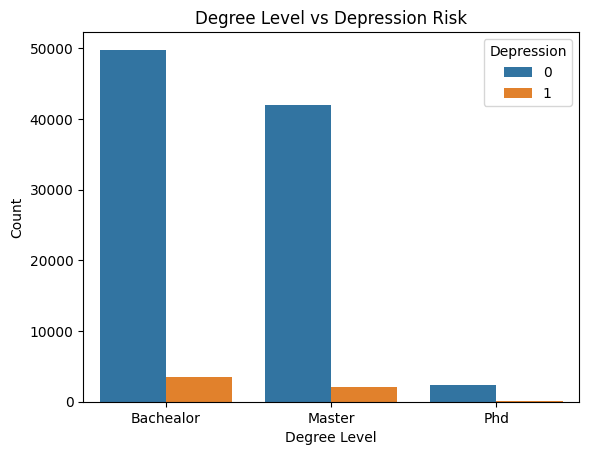

In [362]:
sn.countplot(x='Degree', hue='Depression', data=emp_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [363]:
depression_distribution = emp_trainset['Depression'].value_counts(normalize=True) * 100
print(depression_distribution)

Depression
0    91.814242
1     8.185758
Name: proportion, dtype: float64


In [364]:
empdegree_mapping = {
    'Bachealor' : 2,
    'Master': 1,
    'Phd':0
}

# Veriye uygulama
emp_trainset['Degree'] = emp_trainset['Degree'].map(empdegree_mapping)

In [365]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
44965,Female,46.0,8,8,4.0,1.0,4,1,1.0,Yes,10.0,3.0,No,0
135778,Male,49.0,5,33,3.0,5.0,3,1,1.0,No,9.0,4.0,Yes,0
28424,Female,46.0,7,15,5.0,4.0,4,0,0.0,No,5.0,1.0,Yes,0
25874,Male,59.0,1,7,3.0,4.0,1,0,1.0,No,0.0,3.0,Yes,0
22579,Male,29.0,1,33,1.0,3.0,1,2,1.0,No,11.0,4.0,Yes,0


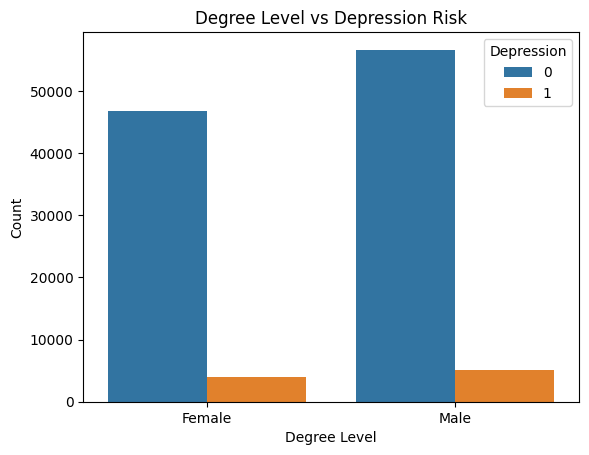

In [366]:
sn.countplot(x='Gender', hue='Depression', data=emp_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [367]:
empdegree_mapping = {
    'Female' : 1,
    'Male': 0,
}

# Veriye uygulama
emp_trainset['Gender'] = emp_trainset['Gender'].map(empdegree_mapping)

In [368]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
48907,0,54.0,20,27,1.0,3.0,2,2,2.0,No,1.0,1.0,Yes,0
58571,1,59.0,17,4,4.0,1.0,2,1,1.0,Yes,12.0,1.0,No,0
104976,0,47.0,23,10,2.0,5.0,4,0,1.0,No,3.0,1.0,Yes,0
70266,0,49.0,11,19,1.0,4.0,4,2,1.0,No,2.0,4.0,No,0
2195,1,20.0,1,36,4.0,5.0,3,0,NaN,No,10.0,3.0,No,0


In [369]:
empever_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
emp_trainset['Have you ever had suicidal thoughts ?'] = emp_trainset['Have you ever had suicidal thoughts ?'].map(empever_mapping)

In [370]:
empfamily_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
emp_trainset['Family History of Mental Illness'] = emp_trainset['Family History of Mental Illness'].map(empfamily_mapping)

In [371]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
92699,1,37.0,28,17,3.0,1.0,1,0,1.0,0,11.0,2.0,0,0
76488,0,32.0,11,7,3.0,2.0,2,2,1.0,1,8.0,3.0,1,0
47947,1,59.0,10,21,1.0,4.0,3,2,2.0,1,7.0,5.0,0,0
42139,0,46.0,7,33,1.0,3.0,4,2,2.0,0,1.0,3.0,1,0
9058,0,60.0,26,22,2.0,1.0,1,2,1.0,1,9.0,5.0,0,0


In [372]:
empnull_columns = emp_trainset.isna().sum()
empnull_columns = empnull_columns[empnull_columns > 0]
empnull_columns

Work Pressure          14
Job Satisfaction       11
Degree              12770
Financial Stress        1
dtype: int64

In [373]:
emp_trainset.shape

(112598, 14)

In [374]:
# Work Pressure veya Job Satisfaction sütunları null olan satırları silme
emp_trainset = emp_trainset.dropna(subset=['Work Pressure', 'Job Satisfaction', 'Financial Stress','Degree'])

# Sonucu kontrol etme
emp_trainset.shape

(99823, 14)

In [375]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(emp_trainset, test_size=0.3, random_state=42)

# Define the features (X) and target variable (y)
X_train = train_set.drop(columns=['Depression'])
y_train = train_set['Depression']
X_test = test_set.drop(columns=['Depression'])
y_test = test_set['Depression']


In [ ]:
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import optuna

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 50, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100)
    }

    model = LGBMClassifier(**params, n_estimators=1000, random_state=42)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error',
              callbacks=[early_stopping(stopping_rounds=50), log_evaluation(10)])

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optuna optimize function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)

[I 2024-12-28 22:29:42,020] A new study created in memory with name: no-name-c5f262ab-0f57-4010-a480-0ac5a1a12f5c


[LightGBM] [Warning] feature_fraction is set=0.7074020221244123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7074020221244123
[LightGBM] [Warning] lambda_l1 is set=5.785642894028347e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.785642894028347e-08
[LightGBM] [Warning] lambda_l2 is set=0.7695337002310665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7695337002310665
[LightGBM] [Warning] bagging_fraction is set=0.7193533352502253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7193533352502253
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7074020221244123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7074020221244123
[LightGBM] [Warning] lambda_l1 is set=5.785642894028347e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.785642894028347e-08
[LightGBM] [Warning] lambda_l2 is set=0.7695337002310

[I 2024-12-28 22:29:44,205] Trial 0 finished with value: 0.9681771128994557 and parameters: {'learning_rate': 0.015085403110971823, 'num_leaves': 143, 'feature_fraction': 0.7074020221244123, 'bagging_fraction': 0.7193533352502253, 'max_depth': 6, 'lambda_l1': 5.785642894028347e-08, 'lambda_l2': 0.7695337002310665, 'min_child_samples': 92}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] feature_fraction is set=0.7016273845094363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7016273845094363
[LightGBM] [Warning] lambda_l1 is set=1.311232035584096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.311232035584096
[LightGBM] [Warning] lambda_l2 is set=0.0001912569663575356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001912569663575356
[LightGBM] [Warning] bagging_fraction is set=0.6464600403805968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6464600403805968
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7016273845094363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7016273845094363
[LightGBM] [Warning] lambda_l1 is set=1.311232035584096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.311232035584096
[LightGBM] [Warning] lambda_l2 is set=0.0001912569663575356, re

[I 2024-12-28 22:29:44,939] Trial 1 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.04724468072287155, 'num_leaves': 81, 'feature_fraction': 0.7016273845094363, 'bagging_fraction': 0.6464600403805968, 'max_depth': 7, 'lambda_l1': 1.311232035584096, 'lambda_l2': 0.0001912569663575356, 'min_child_samples': 37}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_error: 0.0323572	valid_0's binary_logloss: 0.0890561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[103]	valid_0's binary_error: 0.03209	valid_0's binary_logloss: 0.0899976
[LightGBM] [Warning] feature_fraction is set=0.7016273845094363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7016273845094363
[LightGBM] [Warning] lambda_l1 is set=1.311232035584096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.311232035584096
[LightGBM] [Warning] lambda_l2 is set=0.0001912569663575356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001912569663575356
[LightGBM] [War

[I 2024-12-28 22:29:46,194] Trial 2 finished with value: 0.9674424817177013 and parameters: {'learning_rate': 0.022236422626596256, 'num_leaves': 115, 'feature_fraction': 0.8870740319667543, 'bagging_fraction': 0.721912160608756, 'max_depth': 7, 'lambda_l1': 8.979262848061191e-06, 'lambda_l2': 6.218608183687796e-08, 'min_child_samples': 43}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] feature_fraction is set=0.8210815708676327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8210815708676327
[LightGBM] [Warning] lambda_l1 is set=1.1334986946822465e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1334986946822465e-07
[LightGBM] [Warning] lambda_l2 is set=2.5035265670295794e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5035265670295794e-08
[LightGBM] [Warning] bagging_fraction is set=0.7195455795321348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7195455795321348
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8210815708676327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8210815708676327
[LightGBM] [Warning] lambda_l1 is set=1.1334986946822465e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1334986946822465e-07
[LightGBM] [Warning] lambda_l2 is set=2.5

[I 2024-12-28 22:29:47,151] Trial 3 finished with value: 0.9674090893912579 and parameters: {'learning_rate': 0.02548085033548481, 'num_leaves': 151, 'feature_fraction': 0.8210815708676327, 'bagging_fraction': 0.7195455795321348, 'max_depth': 10, 'lambda_l1': 1.1334986946822465e-07, 'lambda_l2': 2.5035265670295794e-08, 'min_child_samples': 93}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] feature_fraction is set=0.8889682294674842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889682294674842
[LightGBM] [Warning] lambda_l1 is set=0.054052069113259195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054052069113259195
[LightGBM] [Warning] lambda_l2 is set=0.0036930016738208537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036930016738208537
[LightGBM] [Warning] bagging_fraction is set=0.7265345393509139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7265345393509139
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8889682294674842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889682294674842
[LightGBM] [Warning] lambda_l1 is set=0.054052069113259195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054052069113259195
[LightGBM] [Warning] lambda_l2 is set=0.00369300167

[I 2024-12-28 22:29:47,380] Trial 4 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.011712523310023142, 'num_leaves': 161, 'feature_fraction': 0.8889682294674842, 'bagging_fraction': 0.7265345393509139, 'max_depth': 5, 'lambda_l1': 0.054052069113259195, 'lambda_l2': 0.0036930016738208537, 'min_child_samples': 100}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.137038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.216091
[LightGBM] [Warning] feature_fraction is set=0.8889682294674842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889682294674842
[LightGBM] [Warning] lambda_l1 is set=0.054052069113259195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054052069113259195
[LightGBM] [Warning] lambda_l2 is set=0.0036930016738208537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036930016738208537
[LightGBM] [Warning] bagging_fraction is set=0.7265345393509139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7265345393509139
[LightGBM] [Warning] feature_fraction is set=0.8685508009479979, colsample_bytree=1.0 will

[I 2024-12-28 22:29:47,565] Trial 5 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.011704276743160168, 'num_leaves': 102, 'feature_fraction': 0.8685508009479979, 'bagging_fraction': 0.74709622602988, 'max_depth': 4, 'lambda_l1': 4.901187502089405, 'lambda_l2': 0.010056579142048246, 'min_child_samples': 94}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] feature_fraction is set=0.8218105533473707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8218105533473707
[LightGBM] [Warning] lambda_l1 is set=0.026329878073471286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026329878073471286
[LightGBM] [Warning] lambda_l2 is set=5.02230638288507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.02230638288507
[LightGBM] [Warning] bagging_fraction is set=0.8111908235685372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8111908235685372
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8218105533473707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8218105533473707
[LightGBM] [Warning] lambda_l1 is set=0.026329878073471286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026329878073471286
[LightGBM] [Warning] lambda_l2 is set=5.02230638288507, reg_l

[I 2024-12-28 22:29:48,249] Trial 6 finished with value: 0.9674424817177013 and parameters: {'learning_rate': 0.03754064325751645, 'num_leaves': 130, 'feature_fraction': 0.8218105533473707, 'bagging_fraction': 0.8111908235685372, 'max_depth': 10, 'lambda_l1': 0.026329878073471286, 'lambda_l2': 5.02230638288507, 'min_child_samples': 34}. Best is trial 0 with value: 0.9681771128994557.


[LightGBM] [Warning] feature_fraction is set=0.8848102040884891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8848102040884891
[LightGBM] [Warning] lambda_l1 is set=9.087690274809569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.087690274809569e-07
[LightGBM] [Warning] lambda_l2 is set=0.0006121713416397155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006121713416397155
[LightGBM] [Warning] bagging_fraction is set=0.8853207423082712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8853207423082712
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8848102040884891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8848102040884891
[LightGBM] [Warning] lambda_l1 is set=9.087690274809569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.087690274809569e-07
[LightGBM] [Warning] lambda_l2 is set=0.0006121

[I 2024-12-28 22:29:48,841] Trial 7 finished with value: 0.9682772898787858 and parameters: {'learning_rate': 0.07000898007630078, 'num_leaves': 182, 'feature_fraction': 0.8848102040884891, 'bagging_fraction': 0.8853207423082712, 'max_depth': 6, 'lambda_l1': 9.087690274809569e-07, 'lambda_l2': 0.0006121713416397155, 'min_child_samples': 70}. Best is trial 7 with value: 0.9682772898787858.


[100]	valid_0's binary_error: 0.0318897	valid_0's binary_logloss: 0.0897152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.0321902	valid_0's binary_logloss: 0.0896241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[I 2024-12-28 22:29:49,110] Trial 8 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.011513181703510207, 'num_leaves': 122, 'feature_fraction': 0.7194856240976393, 'bagging_fraction': 0.8263490454492135, 'max_depth': 9, 'lambda_l1': 3.165528363514736e-07, 'lambda_l2': 1.4812432888513218, 'min_child_samples': 73}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.139476
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.216143
[LightGBM] [Warning] feature_fraction is set=0.7194856240976393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7194856240976393
[LightGBM] [Warning] lambda_l1 is set=3.165528363514736e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.165528363514736e-07
[LightGBM] [Warning] lambda_l2 is set=1.4812432888513218, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4812432888513218
[LightGBM] [Warning] bagging_fraction is set=0.8263490454492135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8263490454492135
[LightGBM] [Warning] feature_fraction is set=0.6460713323804045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6460713323804045
[LightGBM] [War

[I 2024-12-28 22:29:49,829] Trial 9 finished with value: 0.9677430126556917 and parameters: {'learning_rate': 0.07998593692587787, 'num_leaves': 174, 'feature_fraction': 0.6460713323804045, 'bagging_fraction': 0.6233739279612356, 'max_depth': 11, 'lambda_l1': 0.0012991844556983195, 'lambda_l2': 1.4091101119621446e-05, 'min_child_samples': 56}. Best is trial 7 with value: 0.9682772898787858.


Early stopping, best iteration is:
[62]	valid_0's binary_error: 0.032257	valid_0's binary_logloss: 0.0906388
[LightGBM] [Warning] feature_fraction is set=0.6460713323804045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6460713323804045
[LightGBM] [Warning] lambda_l1 is set=0.0012991844556983195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012991844556983195
[LightGBM] [Warning] lambda_l2 is set=1.4091101119621446e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4091101119621446e-05
[LightGBM] [Warning] bagging_fraction is set=0.6233739279612356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6233739279612356
[LightGBM] [Warning] feature_fraction is set=0.7956660244436887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7956660244436887
[LightGBM] [Warning] lambda_l1 is set=1.4587765167164272e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4587765167164272e-05
[LightGBM] [Wa

[I 2024-12-28 22:29:50,379] Trial 10 finished with value: 0.9681771128994557 and parameters: {'learning_rate': 0.09819239262751413, 'num_leaves': 193, 'feature_fraction': 0.7956660244436887, 'bagging_fraction': 0.8940672462030248, 'max_depth': 3, 'lambda_l1': 1.4587765167164272e-05, 'lambda_l2': 2.7635493262257503e-06, 'min_child_samples': 20}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6036112531343165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6036112531343165
[LightGBM] [Warning] lambda_l1 is set=1.4903465167383147e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4903465167383147e-08
[LightGBM] [Warning] lambda_l2 is set=0.06708764592608624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06708764592608624
[LightGBM] [Warning] bagging_fraction is set=0.807962290703457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.807962290703457
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6036112531343165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6036112531343165
[LightGBM] [Warning] lambda_l1 is set=1.4903465167383147e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4903465167383147e-08
[LightGBM] [Warning] lambda_l2 is set=0.067087645

[I 2024-12-28 22:29:51,082] Trial 11 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.0577731022748402, 'num_leaves': 197, 'feature_fraction': 0.6036112531343165, 'bagging_fraction': 0.807962290703457, 'max_depth': 6, 'lambda_l1': 1.4903465167383147e-08, 'lambda_l2': 0.06708764592608624, 'min_child_samples': 76}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.7519270624346935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7519270624346935
[LightGBM] [Warning] lambda_l1 is set=6.124997434121062e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.124997434121062e-06
[LightGBM] [Warning] lambda_l2 is set=0.21845030723511155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21845030723511155
[LightGBM] [Warning] bagging_fraction is set=0.6708440669240222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6708440669240222
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7519270624346935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7519270624346935
[LightGBM] [Warning] lambda_l1 is set=6.124997434121062e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.124997434121062e-06
[LightGBM] [Warning] lambda_l2 is set=0.21845030723

[I 2024-12-28 22:29:52,188] Trial 12 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.019117962847204933, 'num_leaves': 55, 'feature_fraction': 0.7519270624346935, 'bagging_fraction': 0.6708440669240222, 'max_depth': 5, 'lambda_l1': 6.124997434121062e-06, 'lambda_l2': 0.21845030723511155, 'min_child_samples': 78}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6763306894078711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6763306894078711
[LightGBM] [Warning] lambda_l1 is set=4.914158525695616e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.914158525695616e-07
[LightGBM] [Warning] lambda_l2 is set=0.0004536703000571513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004536703000571513
[LightGBM] [Warning] bagging_fraction is set=0.8966424312921109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8966424312921109
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6763306894078711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6763306894078711
[LightGBM] [Warning] lambda_l1 is set=4.914158525695616e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.914158525695616e-07
[LightGBM] [Warning] lambda_l2 is set=0.0004536

[I 2024-12-28 22:29:54,387] Trial 13 finished with value: 0.9679767589407954 and parameters: {'learning_rate': 0.017249403619809072, 'num_leaves': 156, 'feature_fraction': 0.6763306894078711, 'bagging_fraction': 0.8966424312921109, 'max_depth': 8, 'lambda_l1': 4.914158525695616e-07, 'lambda_l2': 0.0004536703000571513, 'min_child_samples': 62}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6763306894078711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6763306894078711
[LightGBM] [Warning] lambda_l1 is set=4.914158525695616e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.914158525695616e-07
[LightGBM] [Warning] lambda_l2 is set=0.0004536703000571513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004536703000571513
[LightGBM] [Warning] bagging_fraction is set=0.8966424312921109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8966424312921109
[LightGBM] [Warning] feature_fraction is set=0.7664976329279976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7664976329279976
[LightGBM] [Warning] lambda_l1 is set=1.1947523419143696e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1947523419143696e-08
[LightGBM] [Warning] lambda_l2 is set=3.027577215771156e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.02757

[I 2024-12-28 22:29:55,306] Trial 14 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.03224614931124612, 'num_leaves': 178, 'feature_fraction': 0.7664976329279976, 'bagging_fraction': 0.6818918242665589, 'max_depth': 6, 'lambda_l1': 1.1947523419143696e-08, 'lambda_l2': 3.027577215771156e-06, 'min_child_samples': 82}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.7210992738529401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7210992738529401
[LightGBM] [Warning] lambda_l1 is set=0.00015387986537497133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015387986537497133
[LightGBM] [Warning] lambda_l2 is set=0.18677215110495785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18677215110495785
[LightGBM] [Warning] bagging_fraction is set=0.78175294261433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78175294261433
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7210992738529401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7210992738529401
[LightGBM] [Warning] lambda_l1 is set=0.00015387986537497133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015387986537497133
[LightGBM] [Warning] lambda_l2 is set=0.18677215110

[I 2024-12-28 22:29:55,827] Trial 15 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.061316640539988185, 'num_leaves': 141, 'feature_fraction': 0.7210992738529401, 'bagging_fraction': 0.78175294261433, 'max_depth': 3, 'lambda_l1': 0.00015387986537497133, 'lambda_l2': 0.18677215110495785, 'min_child_samples': 63}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_error: 0.0320232	valid_0's binary_logloss: 0.088701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Exception ignored on calling ctypes callback function: <function _log_callback at 0x000002225CD2E160>
Traceback (most recent call last):
  File "c:\Users\Umutl\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py", line 257, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_error: 0.0365646	valid_0's binary_logloss: 0.105061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.0359969	valid_0's binary_logloss: 0.102522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-28 22:29:57,460] Trial 16 finished with value: 0.9675426586970314 and parameters: {'learning_rate': 0.015700950434768726, 'num_leaves': 175, 'feature_fraction': 0.6653013506295715, 'bagging_fraction': 0.856241431924694, 'max_depth': 8, 'lambda_l1': 2.0550666066395084e-06, 'lambda_l2': 0.0002112085108216365, 'min_child_samples': 88}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6653013506295715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6653013506295715
[LightGBM] [Warning] lambda_l1 is set=2.0550666066395084e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0550666066395084e-06
[LightGBM] [Warning] lambda_l2 is set=0.0002112085108216365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002112085108216365
[LightGBM] [Warning] bagging_fraction is set=0.856241431924694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.856241431924694
[LightGBM] [Warning] feature_fraction is set=0.8307163806782776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8307163806782776
[LightGBM] [Warning] lambda_l1 is set=0.0001361895652580495, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001361895652580495
[LightGBM] [Warning] lambda_l2 is set=0.005262931920165692, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00526293

[I 2024-12-28 22:29:58,192] Trial 17 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.03885540827828443, 'num_leaves': 97, 'feature_fraction': 0.8307163806782776, 'bagging_fraction': 0.7698172814952028, 'max_depth': 5, 'lambda_l1': 0.0001361895652580495, 'lambda_l2': 0.005262931920165692, 'min_child_samples': 68}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.7743193332985183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743193332985183
[LightGBM] [Warning] lambda_l1 is set=9.090412722055601e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.090412722055601e-08
[LightGBM] [Warning] lambda_l2 is set=1.562887989384888, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.562887989384888
[LightGBM] [Warning] bagging_fraction is set=0.8513300205465505, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8513300205465505
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7743193332985183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743193332985183
[LightGBM] [Warning] lambda_l1 is set=9.090412722055601e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.090412722055601e-08
[LightGBM] [Warning] lambda_l2 is set=1.562887989384888

[I 2024-12-28 22:29:58,935] Trial 18 finished with value: 0.9672755200854843 and parameters: {'learning_rate': 0.06959119107684693, 'num_leaves': 141, 'feature_fraction': 0.7743193332985183, 'bagging_fraction': 0.8513300205465505, 'max_depth': 12, 'lambda_l1': 9.090412722055601e-08, 'lambda_l2': 1.562887989384888, 'min_child_samples': 53}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6201899457188943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6201899457188943
[LightGBM] [Warning] lambda_l1 is set=1.2986074121812228e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2986074121812228e-06
[LightGBM] [Warning] lambda_l2 is set=2.275082133958084e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.275082133958084e-05
[LightGBM] [Warning] bagging_fraction is set=0.6876327210131421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6876327210131421
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6201899457188943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6201899457188943
[LightGBM] [Warning] lambda_l1 is set=1.2986074121812228e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2986074121812228e-06
[LightGBM] [Warning] lambda_l2 is set=2.275

[I 2024-12-28 22:30:00,068] Trial 19 finished with value: 0.9682438975523425 and parameters: {'learning_rate': 0.027050529686204906, 'num_leaves': 166, 'feature_fraction': 0.6201899457188943, 'bagging_fraction': 0.6876327210131421, 'max_depth': 6, 'lambda_l1': 1.2986074121812228e-06, 'lambda_l2': 2.275082133958084e-05, 'min_child_samples': 84}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6061534746158959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6061534746158959
[LightGBM] [Warning] lambda_l1 is set=4.836730023687887e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.836730023687887e-05
[LightGBM] [Warning] lambda_l2 is set=2.1968250846568036e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1968250846568036e-05
[LightGBM] [Warning] bagging_fraction is set=0.6048025285061661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048025285061661
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6061534746158959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6061534746158959
[LightGBM] [Warning] lambda_l1 is set=4.836730023687887e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.836730023687887e-05
[LightGBM] [Warning] lambda_l2 is set=2.19682

[I 2024-12-28 22:30:01,234] Trial 20 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.027574005927963195, 'num_leaves': 183, 'feature_fraction': 0.6061534746158959, 'bagging_fraction': 0.6048025285061661, 'max_depth': 4, 'lambda_l1': 4.836730023687887e-05, 'lambda_l2': 2.1968250846568036e-05, 'min_child_samples': 84}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6302748623572018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6302748623572018
[LightGBM] [Warning] lambda_l1 is set=9.99601740365976e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.99601740365976e-07
[LightGBM] [Warning] lambda_l2 is set=2.299767329800447e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.299767329800447e-07
[LightGBM] [Warning] bagging_fraction is set=0.6965557290461251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6965557290461251
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6302748623572018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6302748623572018
[LightGBM] [Warning] lambda_l1 is set=9.99601740365976e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.99601740365976e-07
[LightGBM] [Warning] lambda_l2 is set=2.29976732980

[I 2024-12-28 22:30:02,943] Trial 21 finished with value: 0.9682105052258991 and parameters: {'learning_rate': 0.01534119584997042, 'num_leaves': 162, 'feature_fraction': 0.6302748623572018, 'bagging_fraction': 0.6965557290461251, 'max_depth': 6, 'lambda_l1': 9.99601740365976e-07, 'lambda_l2': 2.299767329800447e-07, 'min_child_samples': 89}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6302748623572018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6302748623572018
[LightGBM] [Warning] lambda_l1 is set=9.99601740365976e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.99601740365976e-07
[LightGBM] [Warning] lambda_l2 is set=2.299767329800447e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.299767329800447e-07
[LightGBM] [Warning] bagging_fraction is set=0.6965557290461251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6965557290461251
[LightGBM] [Warning] feature_fraction is set=0.6464739379018345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6464739379018345
[LightGBM] [Warning] lambda_l1 is set=1.3335242466758922e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3335242466758922e-06
[LightGBM] [Warning] lambda_l2 is set=1.8927252258260733e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.892725

[I 2024-12-28 22:30:04,657] Trial 22 finished with value: 0.9682105052258991 and parameters: {'learning_rate': 0.02119015344524816, 'num_leaves': 165, 'feature_fraction': 0.6464739379018345, 'bagging_fraction': 0.6779033755589589, 'max_depth': 7, 'lambda_l1': 1.3335242466758922e-06, 'lambda_l2': 1.8927252258260733e-07, 'min_child_samples': 70}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.6374129405878174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6374129405878174
[LightGBM] [Warning] lambda_l1 is set=0.0015177721321256439, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015177721321256439
[LightGBM] [Warning] lambda_l2 is set=4.550213157285613e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.550213157285613e-07
[LightGBM] [Warning] bagging_fraction is set=0.7004984547113904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7004984547113904
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6374129405878174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6374129405878174
[LightGBM] [Warning] lambda_l1 is set=0.0015177721321256439, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015177721321256439
[LightGBM] [Warning] lambda_l2 is set=4.5502131

[I 2024-12-28 22:30:06,114] Trial 23 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.04502266133805554, 'num_leaves': 200, 'feature_fraction': 0.6374129405878174, 'bagging_fraction': 0.7004984547113904, 'max_depth': 6, 'lambda_l1': 0.0015177721321256439, 'lambda_l2': 4.550213157285613e-07, 'min_child_samples': 82}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[229]	valid_0's binary_error: 0.03209	valid_0's binary_logloss: 0.088277
[LightGBM] [Warning] feature_fraction is set=0.6374129405878174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6374129405878174
[LightGBM] [Warning] lambda_l1 is set=0.0015177721321256439, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015177721321256439
[LightGBM] [Warning] lambda_l2 is set=4.550213157285613e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.550213157285613e-07
[LightGBM] [Warning] bagging_fraction is set=0.7004984547113904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7004984547113904
[LightGBM] [Warning] feature_fraction is set=0.628754862105628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.628754862105628
[LightGBM]

[I 2024-12-28 22:30:07,148] Trial 24 finished with value: 0.967943366614352 and parameters: {'learning_rate': 0.030104334179526095, 'num_leaves': 185, 'feature_fraction': 0.628754862105628, 'bagging_fraction': 0.6555744086505746, 'max_depth': 4, 'lambda_l1': 1.540525404951762e-06, 'lambda_l2': 6.59097966300741e-05, 'min_child_samples': 100}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.628754862105628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.628754862105628
[LightGBM] [Warning] lambda_l1 is set=1.540525404951762e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.540525404951762e-06
[LightGBM] [Warning] lambda_l2 is set=6.59097966300741e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.59097966300741e-05
[LightGBM] [Warning] bagging_fraction is set=0.6555744086505746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6555744086505746
[LightGBM] [Warning] feature_fraction is set=0.678926076698681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.678926076698681
[LightGBM] [Warning] lambda_l1 is set=2.1919230405080822e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1919230405080822e-05
[LightGBM] [Warning] lambda_l2 is set=1.0315381563663732e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0315381563

[I 2024-12-28 22:30:07,518] Trial 25 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.010120365490754043, 'num_leaves': 167, 'feature_fraction': 0.678926076698681, 'bagging_fraction': 0.75541829184745, 'max_depth': 8, 'lambda_l1': 2.1919230405080822e-05, 'lambda_l2': 1.0315381563663732e-06, 'min_child_samples': 88}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.216359
[LightGBM] [Warning] feature_fraction is set=0.678926076698681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.678926076698681
[LightGBM] [Warning] lambda_l1 is set=2.1919230405080822e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1919230405080822e-05
[LightGBM] [Warning] lambda_l2 is set=1.0315381563663732e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0315381563663732e-06
[LightGBM] [Warning] bagging_fraction is set=0.75541829184745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75541829184745
[LightGBM] [Warning] feature_fraction is set=0.8476033316619497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8476033316619497
[LightGBM] [Warning] lambda_l1 is set=3.86041846473306e-07, reg_alpha=0.0 will be ign

[I 2024-12-28 22:30:08,909] Trial 26 finished with value: 0.9677764049821351 and parameters: {'learning_rate': 0.013728226414490171, 'num_leaves': 148, 'feature_fraction': 0.8476033316619497, 'bagging_fraction': 0.6931353577071016, 'max_depth': 5, 'lambda_l1': 3.86041846473306e-07, 'lambda_l2': 0.0010149857151531166, 'min_child_samples': 67}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.8476033316619497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8476033316619497
[LightGBM] [Warning] lambda_l1 is set=3.86041846473306e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.86041846473306e-07
[LightGBM] [Warning] lambda_l2 is set=0.0010149857151531166, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010149857151531166
[LightGBM] [Warning] bagging_fraction is set=0.6931353577071016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6931353577071016
[LightGBM] [Warning] feature_fraction is set=0.618332443496203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.618332443496203
[LightGBM] [Warning] lambda_l1 is set=4.78353998506362e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.78353998506362e-06
[LightGBM] [Warning] lambda_l2 is set=1.1718085108784487e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.171808510878

[I 2024-12-28 22:30:09,558] Trial 27 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.04849985678279586, 'num_leaves': 130, 'feature_fraction': 0.618332443496203, 'bagging_fraction': 0.6394653610387022, 'max_depth': 7, 'lambda_l1': 4.78353998506362e-06, 'lambda_l2': 1.1718085108784487e-05, 'min_child_samples': 76}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's binary_error: 0.032257	valid_0's binary_logloss: 0.0891231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-28 22:30:10,448] Trial 28 finished with value: 0.9677430126556917 and parameters: {'learning_rate': 0.023005269963975204, 'num_leaves': 187, 'feature_fraction': 0.7911702519429312, 'bagging_fraction': 0.7497139201886236, 'max_depth': 6, 'lambda_l1': 0.0005793039900717944, 'lambda_l2': 1.3127763226340658e-07, 'min_child_samples': 50}. Best is trial 7 with value: 0.9682772898787858.


[LightGBM] [Warning] feature_fraction is set=0.7000653256340666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7000653256340666
[LightGBM] [Warning] lambda_l1 is set=1.59134385562056e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.59134385562056e-07
[LightGBM] [Warning] lambda_l2 is set=3.399614264151219e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.399614264151219e-06
[LightGBM] [Warning] bagging_fraction is set=0.7027989659392396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7027989659392396
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7000653256340666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7000653256340666
[LightGBM] [Warning] lambda_l1 is set=1.59134385562056e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.59134385562056e-07
[LightGBM] [Warning] lambda_l2 is set=3.39961426415

In [570]:
import joblib
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping

best_params = {
    'learning_rate': 0.03523649017152425,
    'num_leaves': 95,
    'feature_fraction': 0.6801163016875749,
    'bagging_fraction': 0.766671683280163,
    'max_depth': 5,
    'lambda_l1': 5.768454883389513e-06,
    'lambda_l2': 0.09711148137981854,
    'min_child_samples': 83,
    'objective': 'binary',
    'metric': 'binary_error',
    'random_state': 42
}


# Modelin inşa edilmesi
lgbm_empmodel = lgb.LGBMClassifier(**best_params, n_estimators=1000)

# Erken durdurma için callback ekleyerek modelin eğitilmesi
callbacks = [early_stopping(stopping_rounds=50)]

# Modelin eğitilmesi (callback ile erken durdurma kullanılıyor)
lgbm_empmodel.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error', callbacks=callbacks)

# Tahminlerin yapılması
y_pred = lgbm_empmodel.predict(X_test)

# Doğruluk oranının hesaplanması
accuracy = accuracy_score(y_test, y_pred)

print(f"Model doğruluğu: {accuracy:.4f}")


joblib.dump(lgbm_empmodel, 'lgbm_empmodel.pkl')

[LightGBM] [Warning] feature_fraction is set=0.6801163016875749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6801163016875749
[LightGBM] [Warning] lambda_l1 is set=5.768454883389513e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.768454883389513e-06
[LightGBM] [Warning] lambda_l2 is set=0.09711148137981854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09711148137981854
[LightGBM] [Warning] bagging_fraction is set=0.766671683280163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.766671683280163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6801163016875749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6801163016875749
[LightGBM] [Warning] lambda_l1 is set=5.768454883389513e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.768454883389513e-06
[LightGBM] [Warning] lambda_l2 is set=0.0971114813798

['lgbm_empmodel.pkl']